### CLTV Using Probabilistic Models


In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")
np.random.seed(42)

In [ ]:
plt.style.use("ggplot")

In [ ]:
#Linking to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the excel file
df1 = pd.read_excel('/content/drive/MyDrive/online_retail_data1.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/online_retail_data2.xlsx')

In [ ]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [ ]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [ ]:
#Merging 2 files
data = df1._append(df2)
data.shape

(1067371, 8)

In [ ]:
#First 5 samples of data set
data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [ ]:
#Checking for null values
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [ ]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [ ]:
#Now let's check the data before droping these customer ID's
data.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [ ]:
# first drop the rows where the Customer ID is null
data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [ ]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
data.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [ ]:
# Seperating Customers by Countries
temp_df = pd.DataFrame(data["Country"].value_counts())

In [ ]:
temp_df.head(10)

Country
United Kingdom   741301
Germany           17624
EIRE              16195
France            14202
Netherlands        5140
Spain              3811
Belgium            3123
Switzerland        3064
Portugal           2504
Australia          1913

In [ ]:
names  = temp_df.index
names

Index(['United Kingdom', 'Germany', 'EIRE', 'France', 'Netherlands', 'Spain',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Channel Islands',
       'Italy', 'Norway', 'Sweden', 'Cyprus', 'Finland', 'Austria', 'Denmark',
       'Greece', 'Japan', 'USA', 'Poland', 'Unspecified',
       'United Arab Emirates', 'Singapore', 'Israel', 'Malta', 'Iceland',
       'Canada', 'Lithuania', 'RSA', 'Brazil', 'Thailand', 'Korea',
       'European Community', 'Bahrain', 'West Indies', 'Lebanon',
       'Czech Republic', 'Nigeria', 'Saudi Arabia'],
      dtype='object')

In [ ]:
temp_df

Country
United Kingdom         741301
Germany                 17624
EIRE                    16195
France                  14202
Netherlands              5140
Spain                    3811
Belgium                  3123
Switzerland              3064
Portugal                 2504
Australia                1913
Channel Islands          1664
Italy                    1534
Norway                   1455
Sweden                   1345
Cyprus                   1176
Finland                  1049
Austria                   938
Denmark                   817
Greece                    663
Japan                     582
USA                       535
Poland                    535
Unspecified               524
United Arab Emirates      386
Singapore                 346
Israel                    324
Malta                     299
Iceland                   253
Canada                    228
Lithuania                 189
RSA                       123
Brazil                     94
Thailand                   76
Korea                      63
European Community         61
Bahrain                    59
West Indies                54
Lebanon                    45
Czech Republic             30
Nigeria                    30
Saudi Arabia               10

In [ ]:
#no.of transaction per country
px.scatter(temp_df, y = "Country"  , color = names, title = "Count of Countries")

As you can see the United Kingdom has the max transcations as compared to other countries. The one here to note is that the "United Kingdom" is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the United Kingdom from the above chart and see how your axis transforms.

In [ ]:
#Now let's check the total quantity and by country
data.groupby("Country").sum(str)["Quantity"].sort_values(ascending = False).head(10)

Country
United Kingdom    8353502
Netherlands        381951
EIRE               313373
Denmark            235218
Germany            224581
France             183339
Australia          103706
Sweden              87737
Switzerland         51831
Spain               45156
Name: Quantity, dtype: int64

In [ ]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(),
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the Singapore has the highest averge price followed by the Norway and Malta. Let's go deeper and see the distribution to better understand about our data.

In [ ]:
countries = data["Country"].unique()

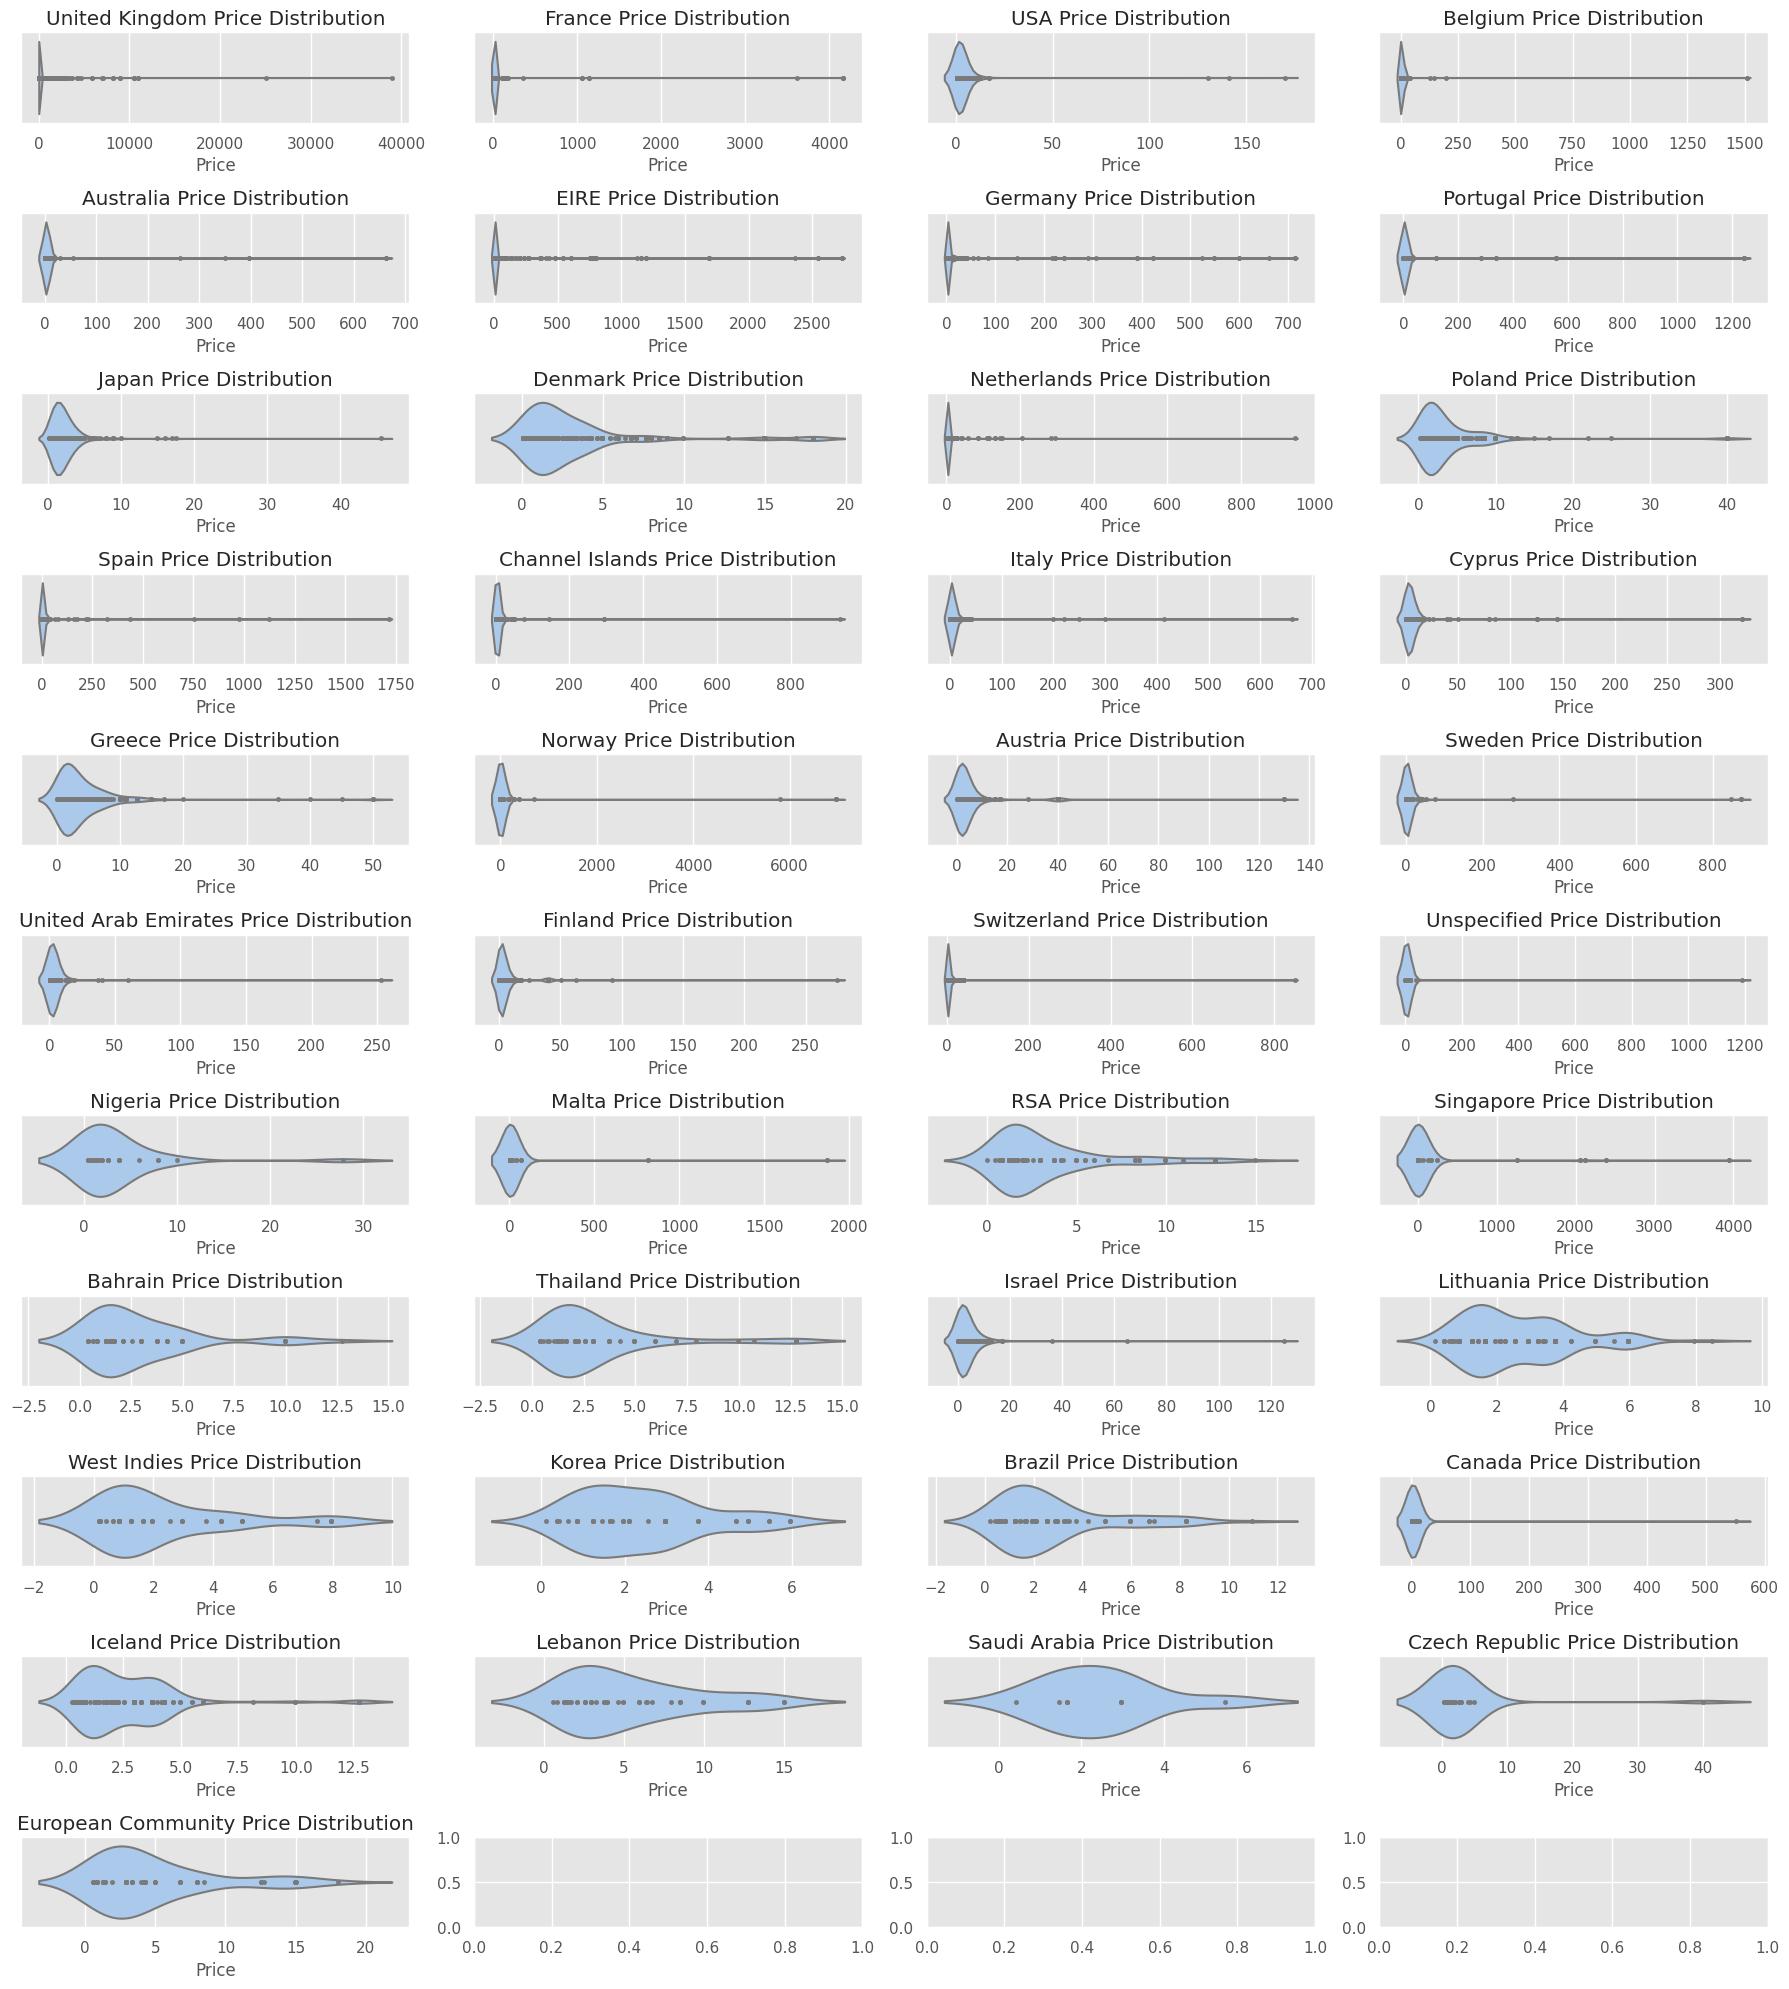

In [ ]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot we can interpret that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [ ]:
#Total Number of Unique Invoices
len(data["Invoice"].unique())

44876

In [ ]:
#Grouping by invoice number
temp_invoice_df = data.groupby("Invoice").sum(str)

In [ ]:
temp_invoice_df.reset_index(inplace = True)

In [ ]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

In [ ]:
data.groupby(["Invoice"]).mean(str).head(15).iloc[:, [1]].sort_values("Price", ascending = False)

Price
Invoice            
489444   141.000000
489447   130.000000
489434     4.081250
489436     3.730526
489437     3.628261
489439     3.560000
489440     3.150000
489446     3.118519
489441     3.042500
489448     2.970000
489435     2.625000
489438     2.591176
489445     2.477895
489443     2.370000
489442     2.040870

Data has been grouped by the Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number 489444 & 489447 has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.



In [ ]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

Invoice StockCode Description  Quantity         InvoiceDate  Price  \
126  489444      POST     POSTAGE         1 2009-12-01 09:55:00  141.0   
173  489447      POST     POSTAGE         1 2009-12-01 10:10:00  130.0   

     Customer ID  Country  
126      12636.0      USA  
173      12362.0  Belgium

As you can see above, These 2 invoices with invoice number **489444** and **489447** had only single transaction, that's why the average price was too high.

### **INITIAL EDA(exploratory data analysis) INSIGHTS:**

1) Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) There are total 44876 uniques purchased happend so far.

5) We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

6) When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [ ]:
#Let's look at the data once again & see what else insights we can get from the data itself
data.head(15)

Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5   489434     22064           PINK DOUGHNUT TRINKET POT         24   
6   489434     21871                  SAVE THE PLANET MUG        24   
7   489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8   489435     22350                            CAT BOWL         12   
9   489435     22349       DOG BOWL , CHASING BALL DESIGN        12   
10  489435     22195         HEART MEASURING SPOONS LARGE        24   
11  489435     22353   LUNCHBOX WITH CUTLERY FAIRY CAKES         12   
12  489436    48173C                DOOR MAT BLACK FLOCK         10   
13  489436     21755             LOVE BUILDING BLOCK WORD        18   
14  489436     21754             HOME BUILDING BLOCK WORD         3   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5  2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7  2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8  2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9  2009-12-01 07:46:00   3.75      13085.0  United Kingdom  
10 2009-12-01 07:46:00   1.65      13085.0  United Kingdom  
11 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
13 2009-12-01 09:06:00   5.45      13078.0  United Kingdom  
14 2009-12-01 09:06:00   5.95      13078.0  United Kingdom

<Axes: xlabel='Description'>

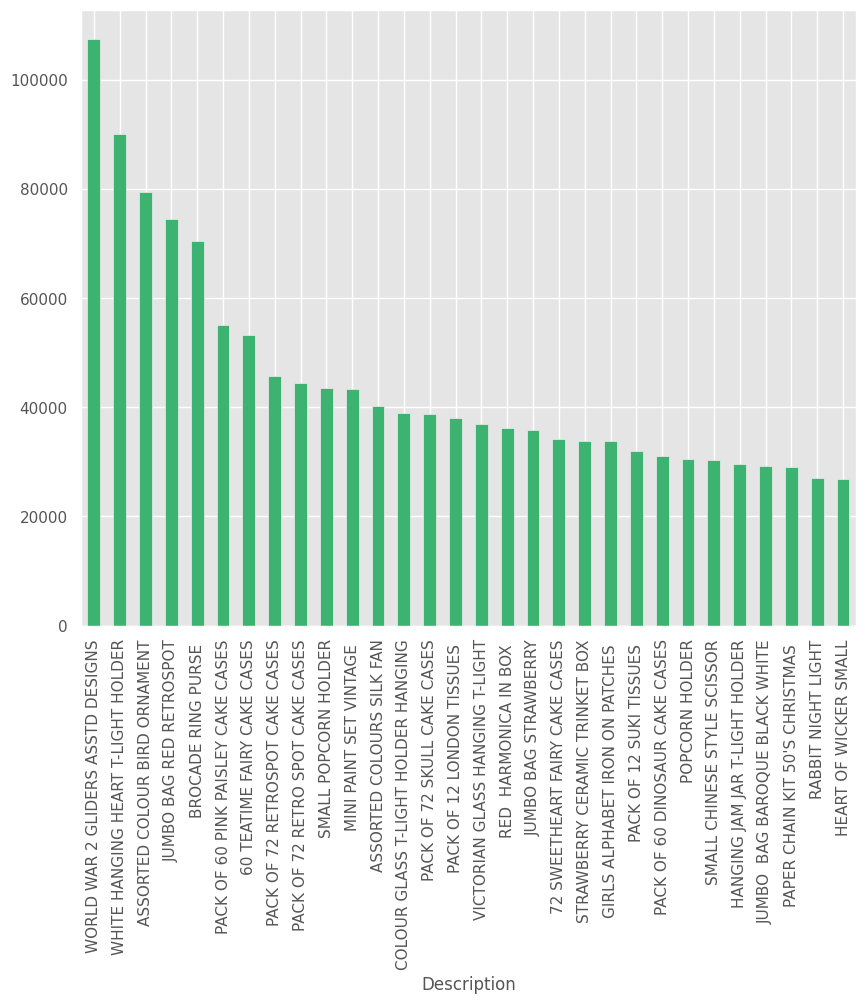

In [ ]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum(str).sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')

In [ ]:
temp_data = data.copy()

In [ ]:
temp_data.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [ ]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [ ]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [ ]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

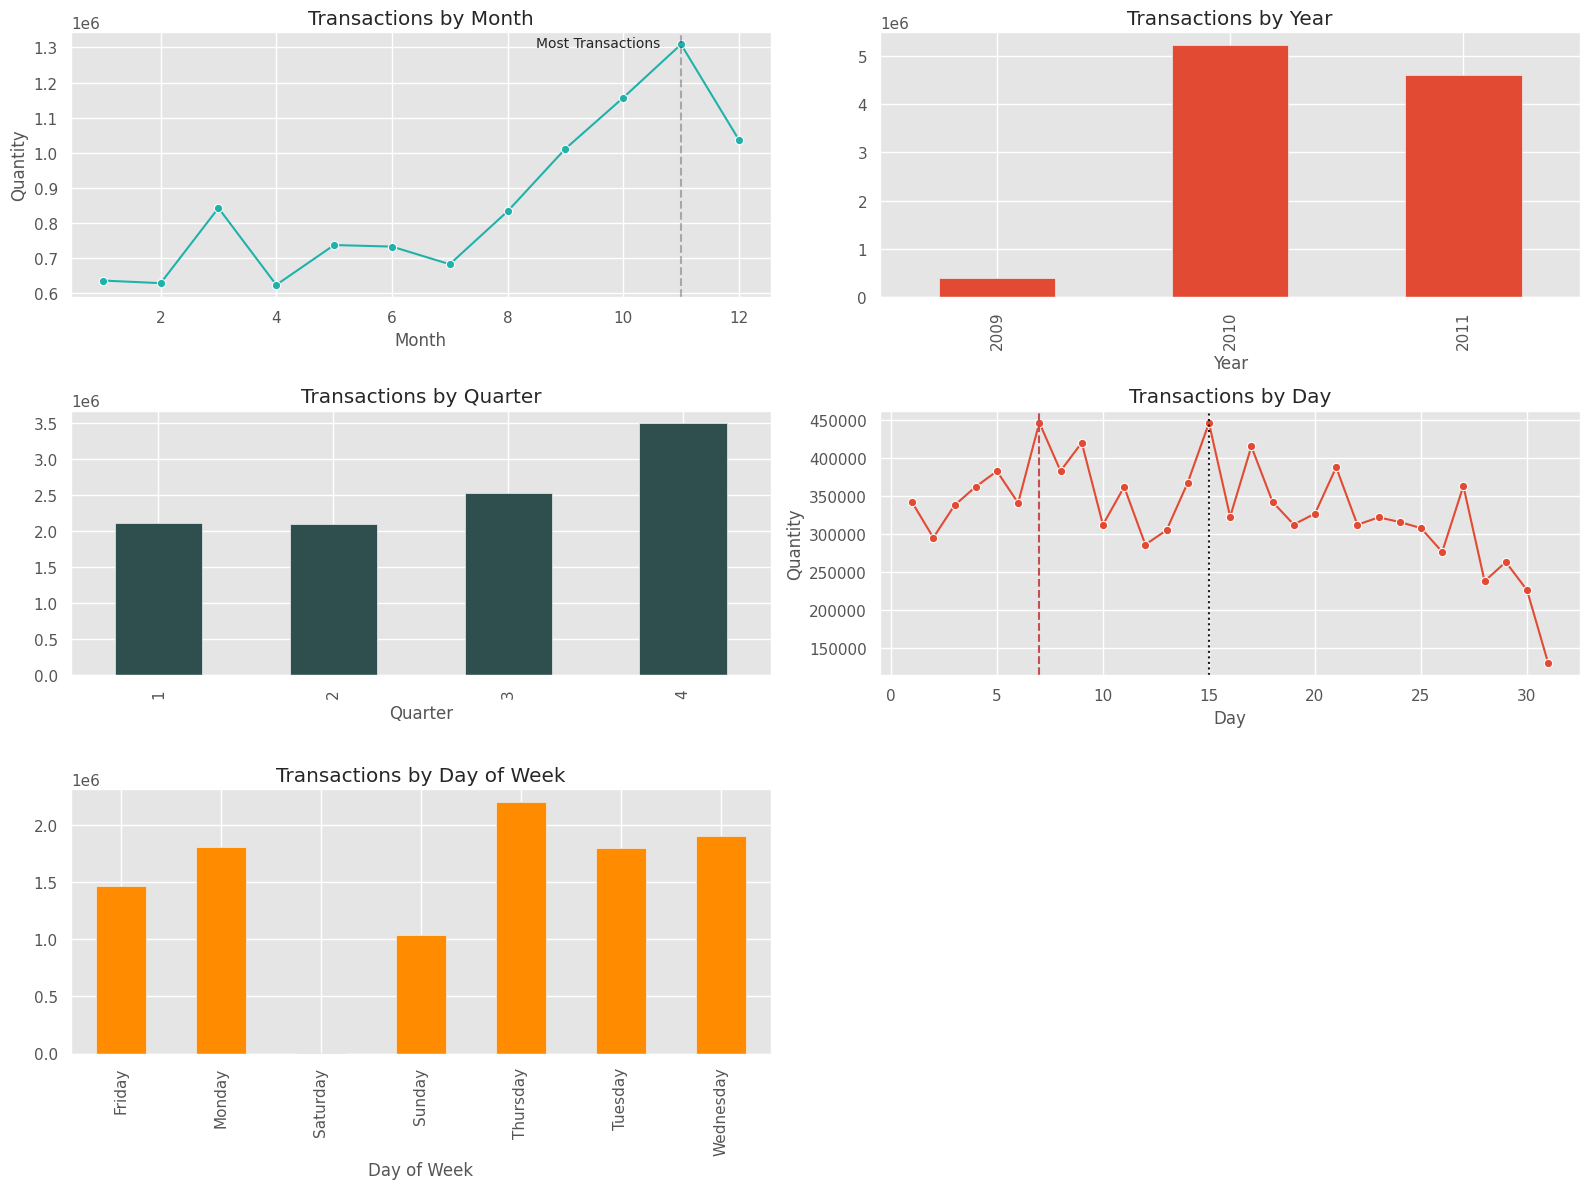

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year").sum(str)["Quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum(str)["Quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum(str)["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years

In [ ]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2010: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2011: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2011: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2010: 37
Total Number of Transactions in 2010: 5233315
--------------------------------------------
Total Number of Countries in 2011: 36
Total Number of Transactions in 2011: 4610527


Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [ ]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [ ]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [ ]:
temp = data.groupby(["Country", "Description"]).sum(str)["Quantity"]

In [ ]:
temp = pd.DataFrame(temp)

### Top 8 Countries With Most Transactions

In [ ]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

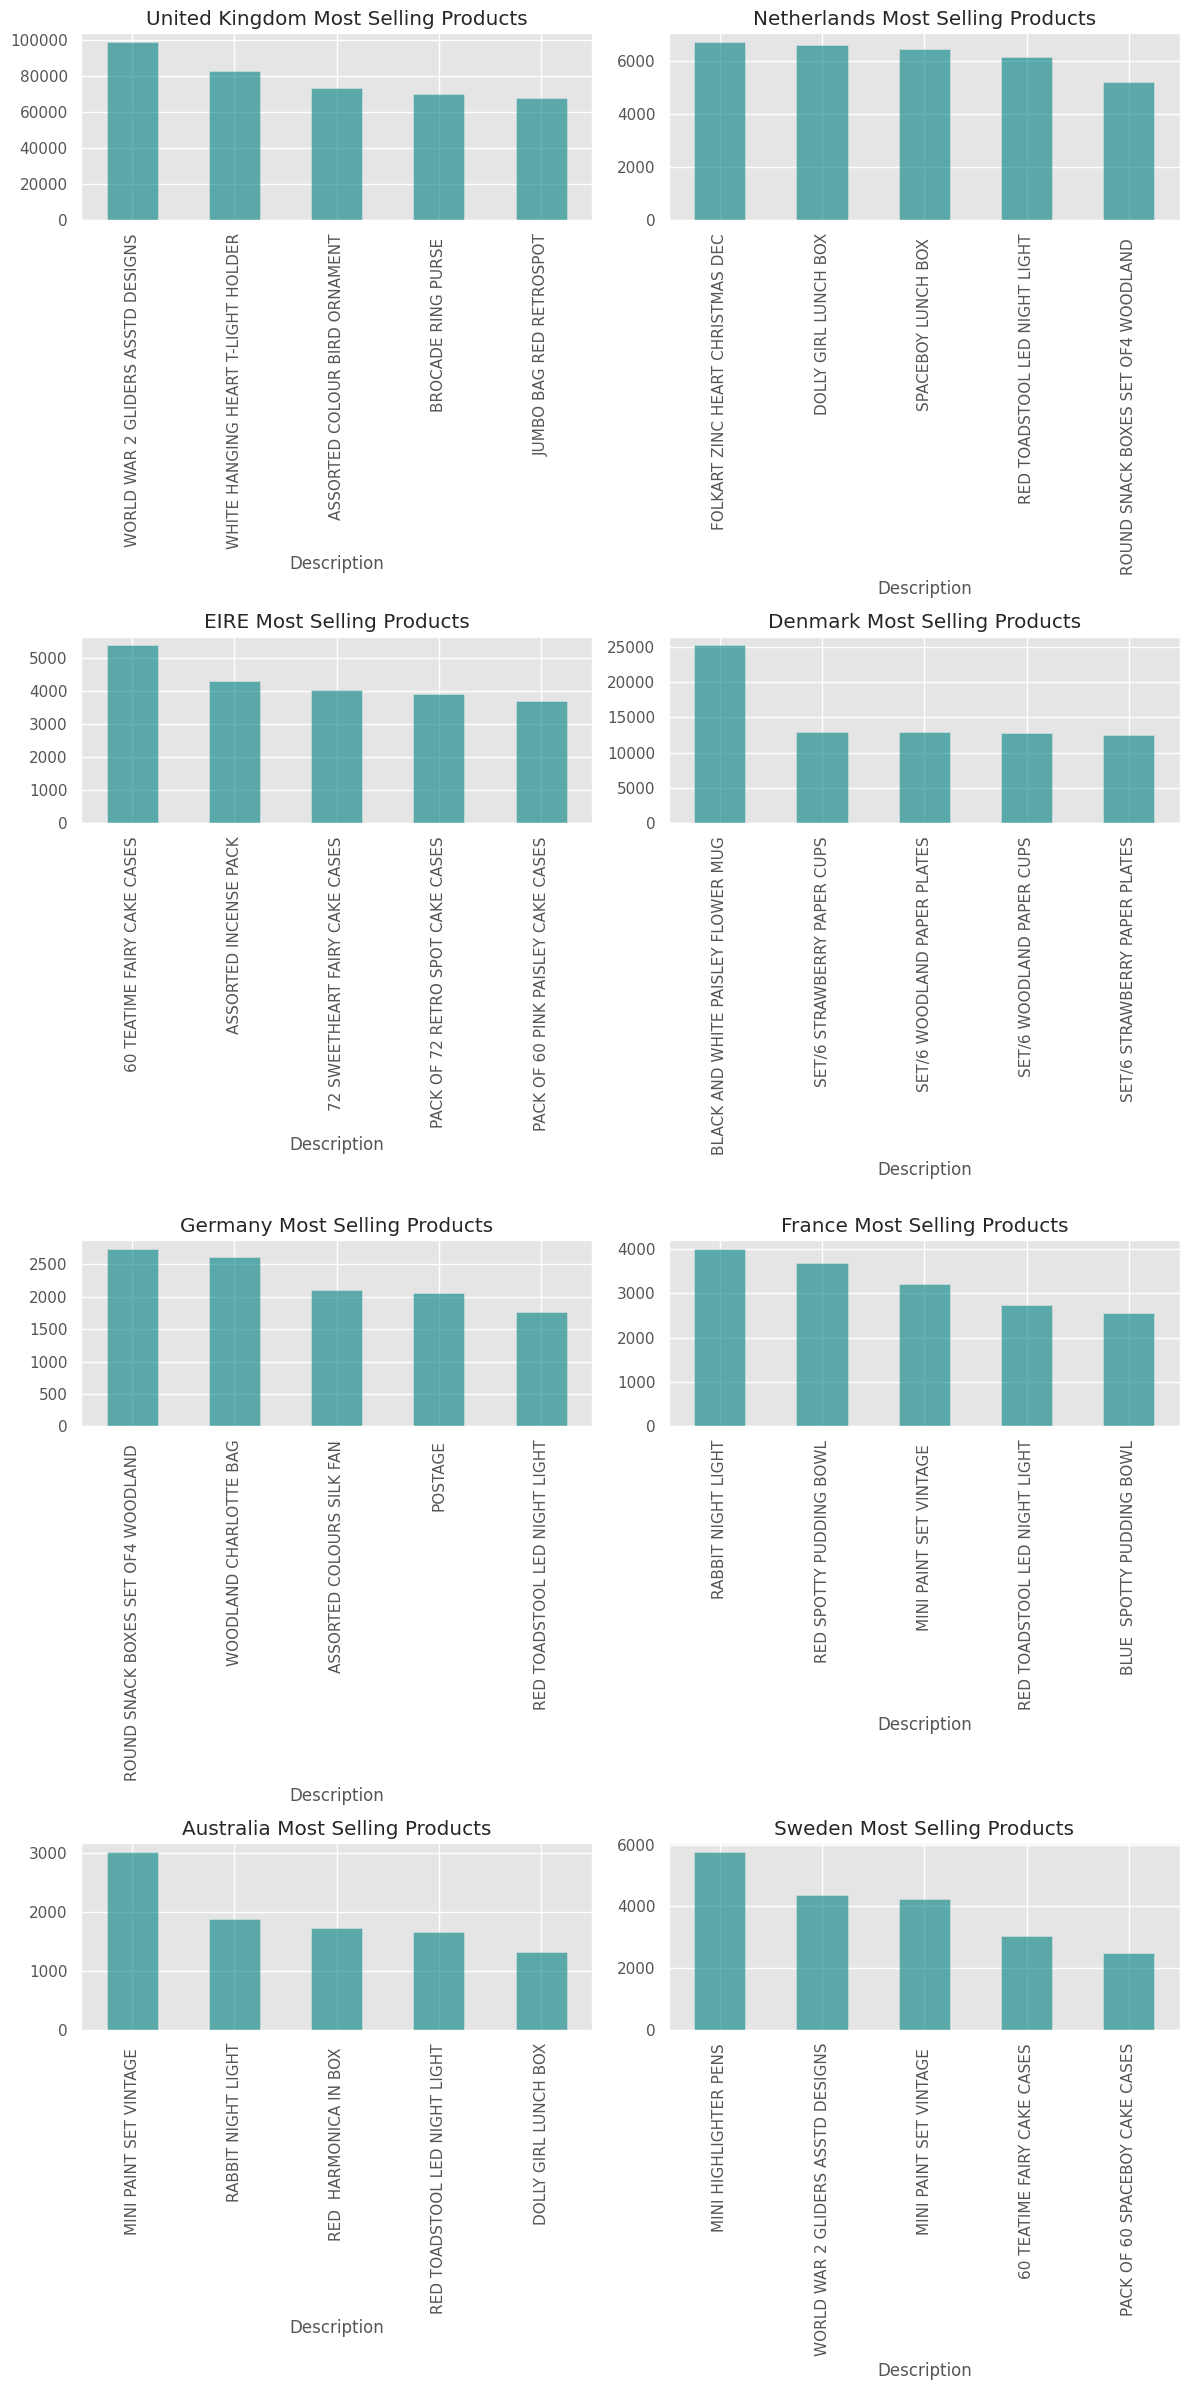

In [ ]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

### 8 Countries With Least Transactions

In [ ]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

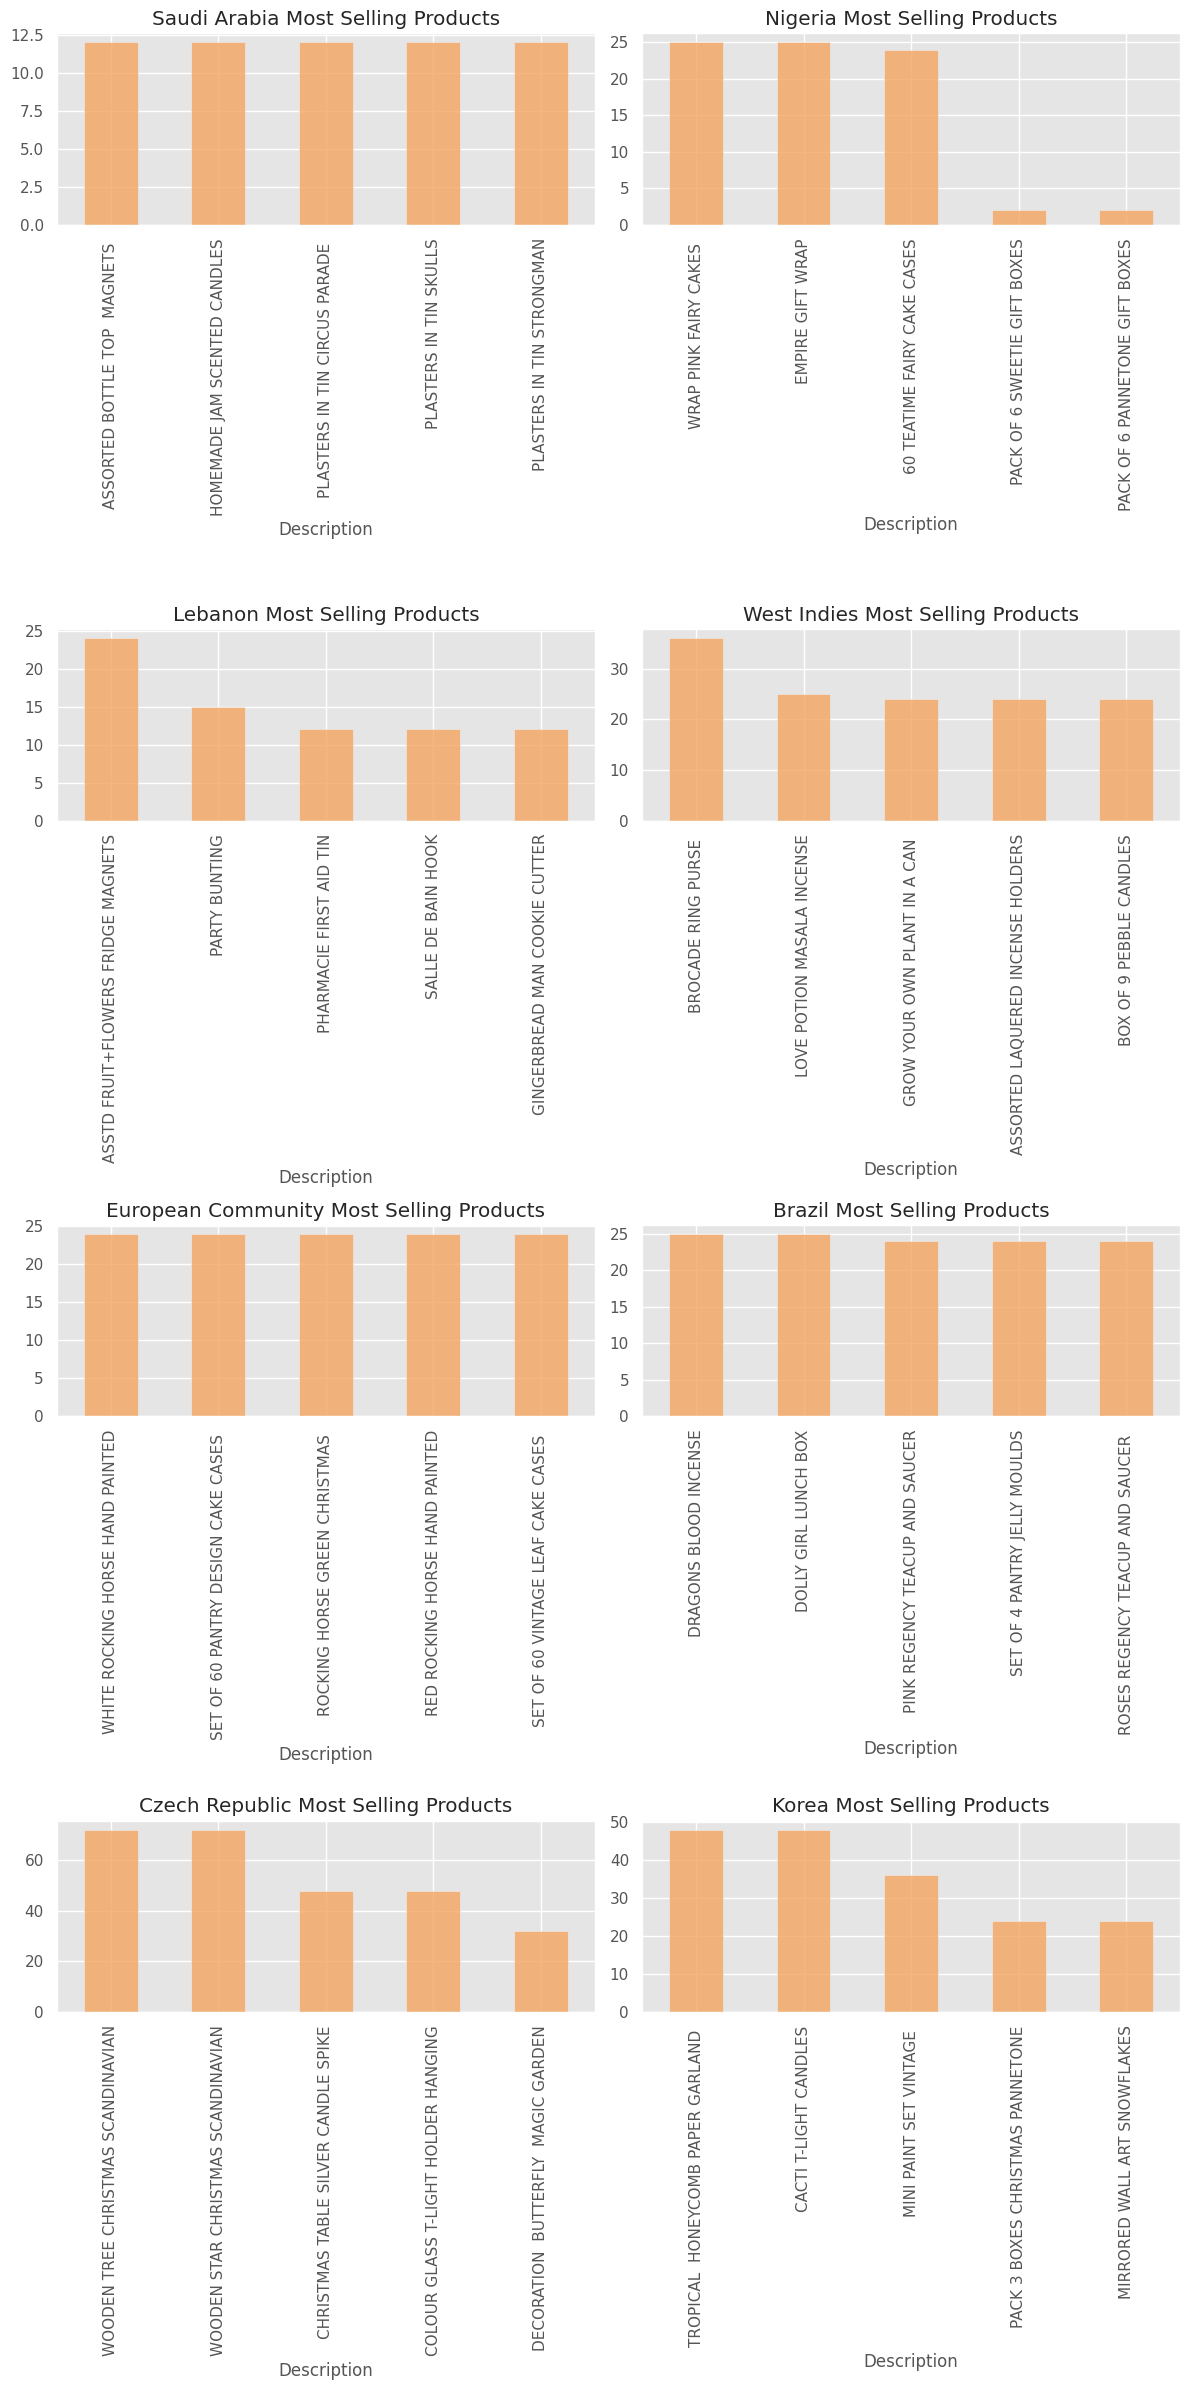

In [ ]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)

    plt.tight_layout()

### **EDA INSIGHTS:**


1) Top 5 Best Selling Products are **World War 2 Gliders**, **White Hanging Heart**, **Assorted Colour Bird**, **Jumbo Bag Red**, **Brocade Ring**.

2) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3) 2010 is the year in which we have the most transactions followed by the 2011

4) Q4 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on Thursday followed by Tuesday and Wednesday.


## RFM Estimation - (Recency, Frequency, Monetary)

Recency: How recently a customer has made a purchase.

Frequency: How often a customer makes a purchase.

Monetary: The amount spent by a customer.

Tenure: The length of time a customer has been associated with the business.

In [ ]:
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [ ]:
#finding the total amount per transaction
data["Total Amount"] = data["Quantity"]*data["Price"]
data.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  Total Amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0

In [ ]:
#importing libraries
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00


In [ ]:
import lifetimes

In [ ]:
#Generating RFM (Recency, Frequency, Monetary) summary data using transactional data
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [ ]:
rfm_summary.head()

frequency  recency      T  monetary_value
Customer ID                                           
12346.0           10.0    400.0  725.0      -15.468000
12347.0            7.0    402.0  404.0      717.398571
12348.0            4.0    363.0  438.0      449.310000
12349.0            4.0    717.0  735.0     1107.172500
12350.0            0.0      0.0  310.0        0.000000

In [ ]:
rfm_summary.reset_index(inplace = True)

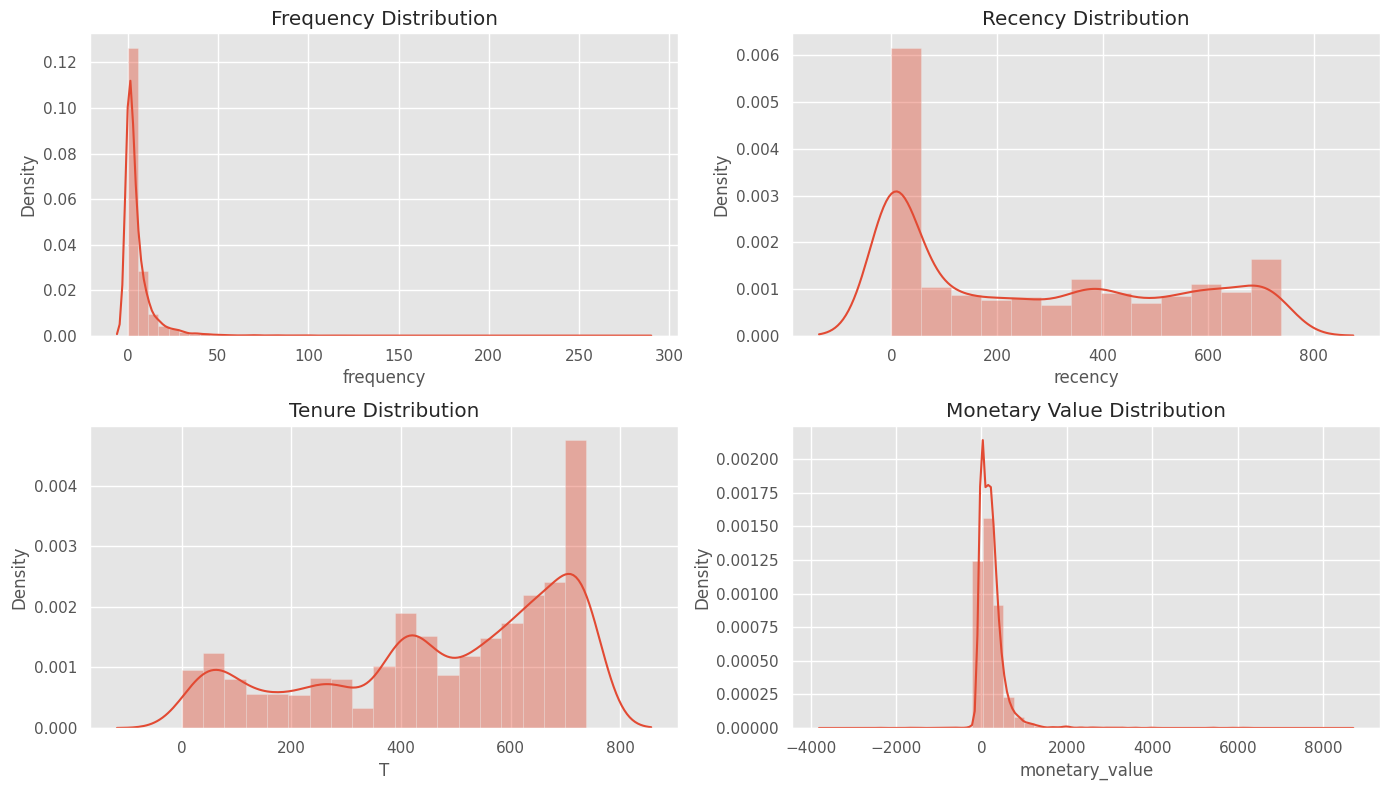

In [ ]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("Tenure Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

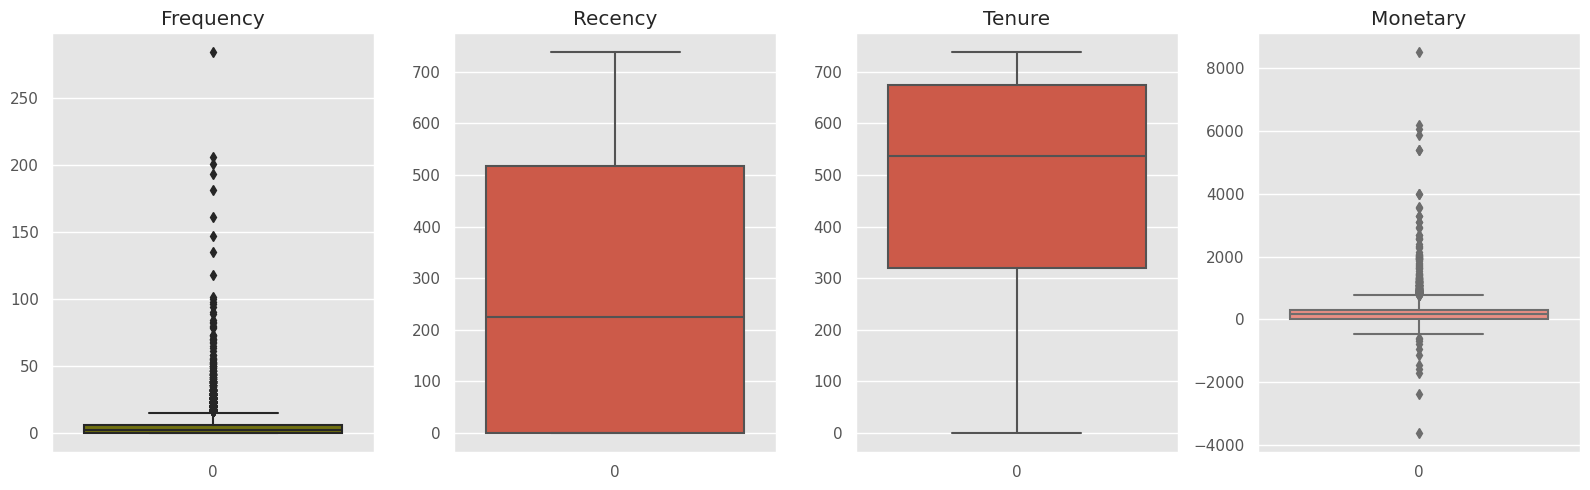

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("Tenure")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")
plt.title("Monetary")
plt.tight_layout()

In [ ]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

Customer ID    frequency      recency            T  monetary_value
count   5942.000000  5942.000000  5942.000000  5942.000000     5942.000000
mean   15316.500000     5.479636   275.772299   478.229384      228.814496
std     1715.451981    11.293673   259.830840   223.879537      363.067124
min    12346.000000     0.000000     0.000000     0.000000    -3610.500000
1%     12405.410000     0.000000     0.000000    15.000000      -40.623900
10%    12940.100000     0.000000     0.000000    89.000000        0.000000
25%    13831.250000     0.000000     0.000000   320.500000        0.000000
50%    15316.500000     2.000000   225.000000   536.000000      174.900625
75%    16801.750000     6.000000   518.000000   674.000000      314.594375
90%    17692.900000    13.000000   672.900000   731.000000      502.095625
99%    18227.590000    44.590000   734.000000   738.000000     1328.480453
max    18287.000000   284.000000   738.000000   738.000000     8513.271143

As we can see how are frequency changing from 90 percentile to 99 percentile but same not the case with the recency as there is no much jump in the numbers so we can clearly see from there as well as there are some extreme values contains both in the frequency and monetary value.

Now the data related to the RFM, we can now start with which model we can build to predict our customer's lifetime value. First we have to figure out either we have to do the prediction based on the customer level or the aggregate level.Before building the model, we have to understand few of the most important things. We have to understand the business context that is the type of customers (contractual or non-contractual) and their purchase opportunity (discrete or continuous). The combination of both defines the business context which going to affect our CLV estimation approach.

Basic Terms:

a) Contractual Customers - Contractual customers are subscription based customers. They churned on a defined date if they choose not to renew the subscription.

b) Non-Contractual Customers - Non Contractual customers generally exist in e-commerce or retail business where there's no defined time period when the customer is going to churn.

c) Continuous Purchase - It refers to the time period when the customer purchase a certain thing in any time period. Ex- Retail & E-commerce.

d) Discrete Purchase - It refers to the time period when the customer purchase a certain thing on a specific time period. Ex - Netflix, Hulu, Hotstar Subscription.

For this analysis we are going to use the non-contractual with continuous purchase opportunity and the best fitted models we are going to use will be BG-NBD Model, Pareto-NBD Model, Modifies BG Model along with Gamma Gamma Distribution model for estimating the expected monetary value as a part of the customer lifetime value prediction.

## Beta Geo - Negative Binomial Distribution + Gamma Gamma Distribution Model

In [ ]:
#importing libraries
import lifetimes
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
from lifetimes import ModifiedBetaGeoFitter
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

In [ ]:
# Creating a copy of the 'rfm_summary' DataFrame and storing it in 'summary_bgf'
summary_bgf = rfm_summary.copy()

In [ ]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571

In [ ]:
# We can use penalizer of 0.001 or 0.1 which we will be going to use later on based on the model performance and model selection
# Creating an instance of the Beta Geometric/NBD (BG/NBD) model using the BetaGeoFitter class
# 'penalizer_coef=0.0' sets the penalizer coefficient to zero, implying no penalization for model complexity
bgf = BetaGeoFitter(penalizer_coef = 0.0)

In [ ]:
# estimate the parameters of the Beta Geometric/NBD model based on the frequency, recency, and customer age (time since first transaction) from the provided summary data
bgf.fit(summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>

In [ ]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.668170  0.015453         0.637882         0.698458
alpha  49.943472  1.517728        46.968725        52.918220
a       0.145498  0.014512         0.117055         0.173941
b       2.112726  0.313787         1.497704         2.727749

In [ ]:
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 5942 subjects, a: 0.15, alpha: 49.94, b: 2.11, r: 0.67>


<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

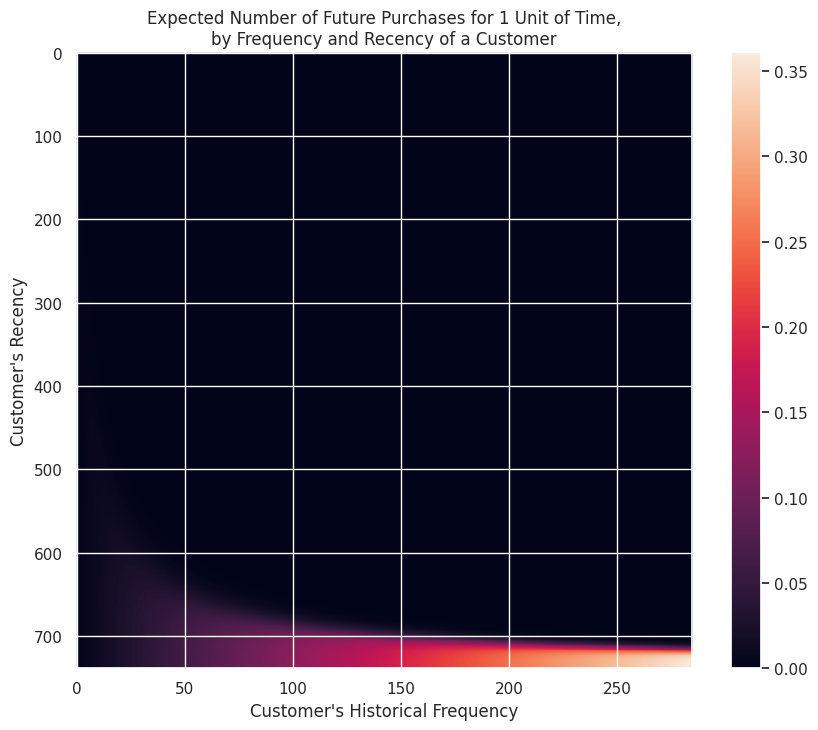

In [ ]:
#plotting the frequency and recency matrix
plt.figure(figsize=(10,8))
plot_frequency_recency_matrix(bgf)

As you can see our best customers is where frequency is 250 and recency is 700+.

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

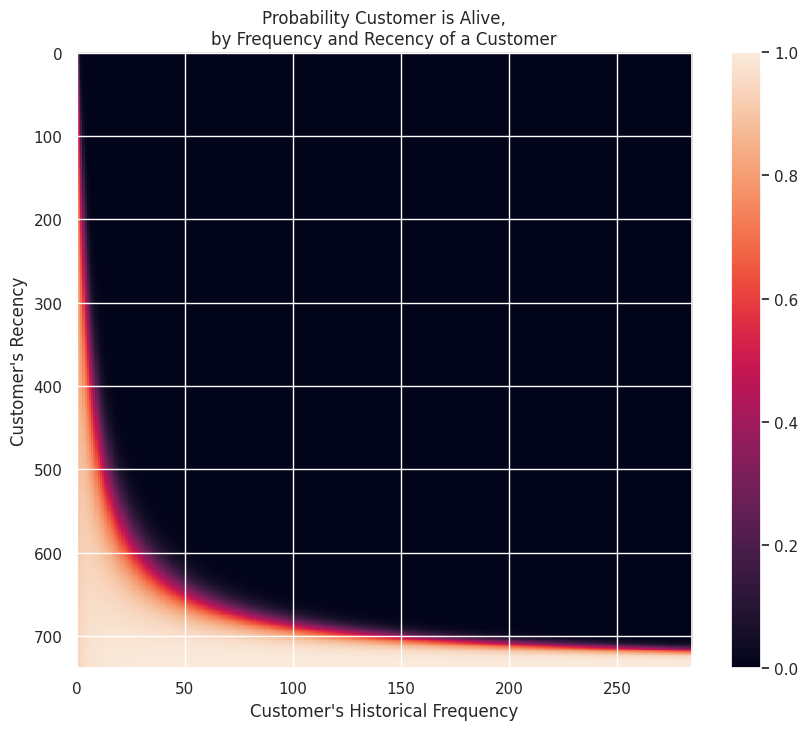

In [ ]:
#plotting the churn matrix
plt.figure(figsize=(10,8))
plot_probability_alive_matrix(bgf)

As you can see our 80% customers have already churn or we can say dropped.

In [ ]:
# Setting a time period 't' as 30 (in the selected time units)
t = 30
#estimate the expected future purchases for each customer
summary_bgf["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_bgf["frequency"], summary_bgf["recency"], summary_bgf["T"])

In [ ]:
summary_bgf.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  \
2260      14606.0      181.0    735.0  736.0      165.079448   
5495      17841.0      193.0    736.0  737.0      357.437461   
2965      15311.0      201.0    738.0  738.0      560.647015   
402       12748.0      206.0    735.0  735.0      241.501117   
2565      14911.0      284.0    737.0  738.0      948.996127   

      predicted_purchases  
2260             6.908522  
5495             7.355876  
2965             7.651860  
402              7.871598  
2565            10.800953

Based on the above analysis, above are the top customers who are likely to purchase in the next day.

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

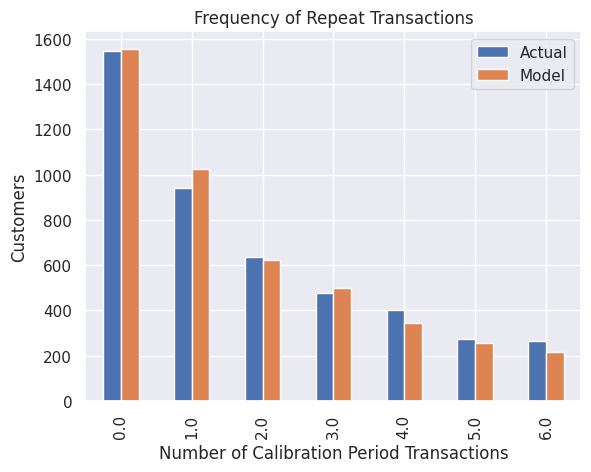

In [ ]:
#generate a plot that compares the actual (observed) versus predicted number of transactions in each time period based on the fitted Beta Geometric/NBD model
plot_period_transactions(bgf)

We can see that our model is doing fair job. The model is predicting fairly good at the 0 & 2 calibration time period.

In [ ]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate",
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [ ]:
pd.DataFrame(summary_cal_holdout.head())

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [ ]:
#estimate the parameters of the BG/NBD model for holdout data
bgf.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.BetaGeoFitter: fitted with 5025 subjects, a: 0.22, alpha: 49.70, b: 2.72, r: 0.67>

In [ ]:
summary_cal_holdout

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   
...                    ...          ...    ...                ...   
18283.0                9.0        458.0  474.0                9.0   
18284.0                1.0          2.0  247.0                0.0   
18285.0                0.0          0.0  476.0                0.0   
18286.0                2.0        247.0  539.0                0.0   
18287.0                4.0        537.0  554.0                2.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0  
...                       ...  
18283.0                 184.0  
18284.0                 184.0  
18285.0                 184.0  
18286.0                 184.0  
18287.0                 184.0  

[5025 rows x 5 columns]

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

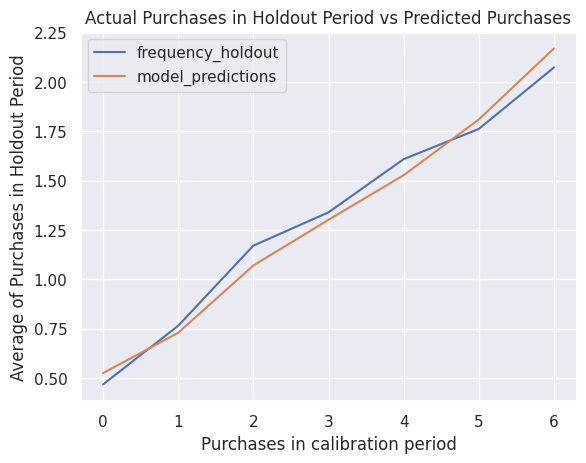

In [ ]:
# Plotting the comparison between predicted purchases in the calibration period and actual purchases in the holdout period
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

As we can see the model does the decent job while predicting the purchase behaviour.

In [ ]:
summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [ ]:
#Creating a function which can predict the future purchased value based on the lookup window
#calculates the prediction error for an individual customer based on the Beta Geometric/NBD (BG/NBD) model.
def bgf_get_pred_error(t, id_):

    individual = summary_bgf[summary_bgf["Customer ID"] == id_]

    ind_pred = bgf.predict(t, individual["frequency"], individual["recency"], individual["T"])

    actual_val = individual["frequency"]/individual["recency"]*t

    error = actual_val - ind_pred

    print("Your Predicted Purchase: %s" % (ind_pred))
    print("Your Actual Purchase: %s" % (actual_val))
    print("Prediction Error: %s" % (error))

In [ ]:
bgf_get_pred_error(15, 12348.0)

Your Predicted Purchase: 2    0.132161
dtype: float64
Your Actual Purchase: 2    0.165289
dtype: float64
Prediction Error: 2    0.033128
dtype: float64


In [ ]:
id_1 = 14606.0
id_2 = 12347.0

In [ ]:
days_since_birth = 365

In [ ]:
sp_trans_1 = data[data["Customer ID"] == id_1]
sp_trans_2 = data[data["Customer ID"] == id_2]

<Axes: title={'center': 'History of P_alive'}, ylabel='P_alive'>

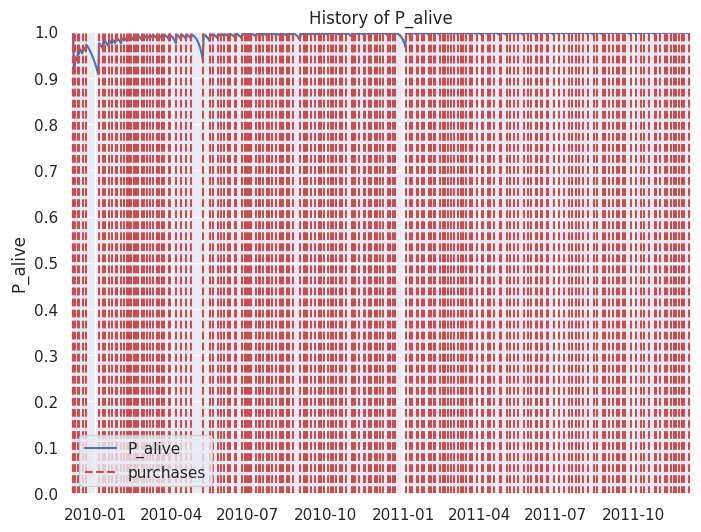

In [ ]:
#visualize the probability of a customer being "alive" (still active) over time
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth,sp_trans_1, "InvoiceDate")

<Axes: title={'center': 'History of P_alive'}, ylabel='P_alive'>

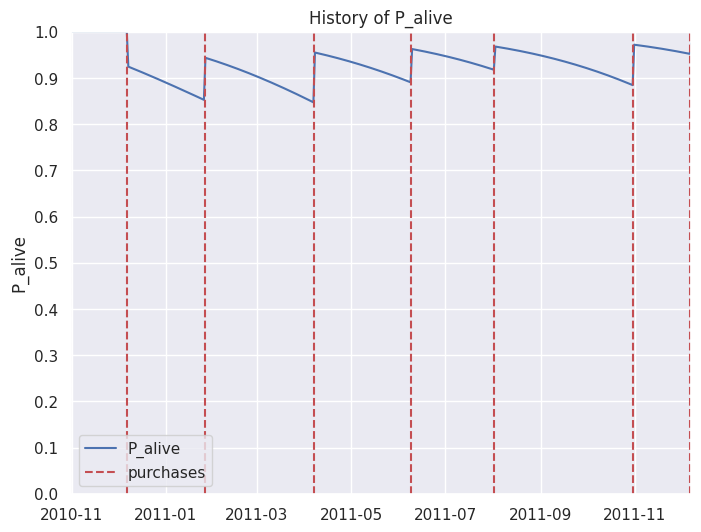

In [ ]:
#visualize the probability of a customer being "alive" (still active) over time
plt.figure(figsize=(8,6))
plot_history_alive(bgf, days_since_birth, sp_trans_2, "InvoiceDate")

As we can see in the above plot, after doing purchase on a certain time period, our customer will get's activated again.

In [ ]:
# Calculating an 'actual' metric for a specific time period (30 days) using frequency and recency
summary_bgf["actual_30"] = summary_bgf["frequency"]/summary_bgf["recency"]*30

In [ ]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.077362   0.750000  
1             0.495352   0.522388  
2             0.269178   0.330579  
3             0.172500   0.167364  
4             0.055446        NaN

In [ ]:
summary_bgf = summary_bgf.fillna(value = 0) #filling null values with 0

In [ ]:
#calculating the prediction error for the 30 days purchase prediction
summary_bgf["Error"] = summary_bgf["actual_30"] - summary_bgf["predicted_purchases"]

In [ ]:
mse = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])

In [ ]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_bgf["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.337882659974866
Average Error:  0.41179765536782537
Root Mean Squared Error: 2.082758425736136


In [ ]:
#Purchase Prediction
bgf_mse_purchase = mean_squared_error(summary_bgf["actual_30"],summary_bgf["predicted_purchases"])
bgf_rmse_purchase_30 = sqrt(bgf_mse_purchase)
bgf_avg_error_purchase_30 = summary_bgf["Error"].mean()

**Note:** This error is based on the 30 days lookup window, it may vary as you adjust the lookup window time.

In [ ]:
summary_bgf.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036  
2             0.269178   0.330579  0.061401  
3             0.172500   0.167364 -0.005136  
4             0.055446   0.000000 -0.055446

In [ ]:
#Filtering the data where we have the values of 0 or less than 0.
res_summary = summary_bgf[summary_bgf["frequency"] > 0]

In [ ]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

<Axes: >

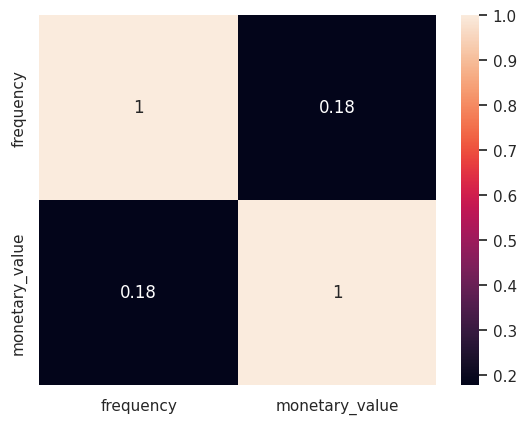

In [ ]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

To proceed with the Gamma Gamma Model we have to check for the assumption whether the frequency and monetary values are intercorrelated or not. As we can see here, the correlation between the frequency and monetary value is pretty low so we can go ahead to build Gamma Gamma Model.

### Gamma Gamma Model

In [ ]:
# Creating an instance of the Gamma-Gamma model using the GammaGammaFitter class
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [ ]:
#estimate the parameters of the Gamma-Gamma model based on the frequency and monetary value
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [ ]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [ ]:
summary_bgf.head(2)

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   

   predicted_purchases  actual_30     Error  
0             0.077362   0.750000  0.672638  
1             0.495352   0.522388  0.027036

In [ ]:
summary_ = summary_bgf[(summary_bgf["monetary_value"] > 0) & (summary_bgf["frequency"] > 0)]

In [ ]:
summary_.shape

(4185, 8)

In [ ]:
# Calculating the expected average sales value for each customer using the Gamma-Gamma model
summary_["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_["frequency"],
                                                                        summary_["monetary_value"])

In [ ]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  
1             0.495352   0.522388  0.027036          629.556290  
2             0.269178   0.330579  0.061401          409.972301  
3             0.172500   0.167364 -0.005136          842.513995  
6             0.566836   0.674157  0.107321          242.209404  
7             0.091934   0.147059  0.055125          254.858476

In [ ]:
#to compare the expected average sales values (calculated using the Gamma-Gamma model) with the actual average sales values (summary_["monetary_value"])
print("Expected Average Sales: %s" % summary_["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_["monetary_value"].mean())
print("Difference: %s" % (summary_["monetary_value"].mean() - summary_["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_["monetary_value"], summary_["Expected_Avg_Sales"])))

Expected Average Sales: 340.1889755829261
Actual Average Sales: 330.6608495198251
Difference: -9.528126063101013
Mean Squared Error: 20896.881880784826
Root Mean Squared Error: 144.55753830494217


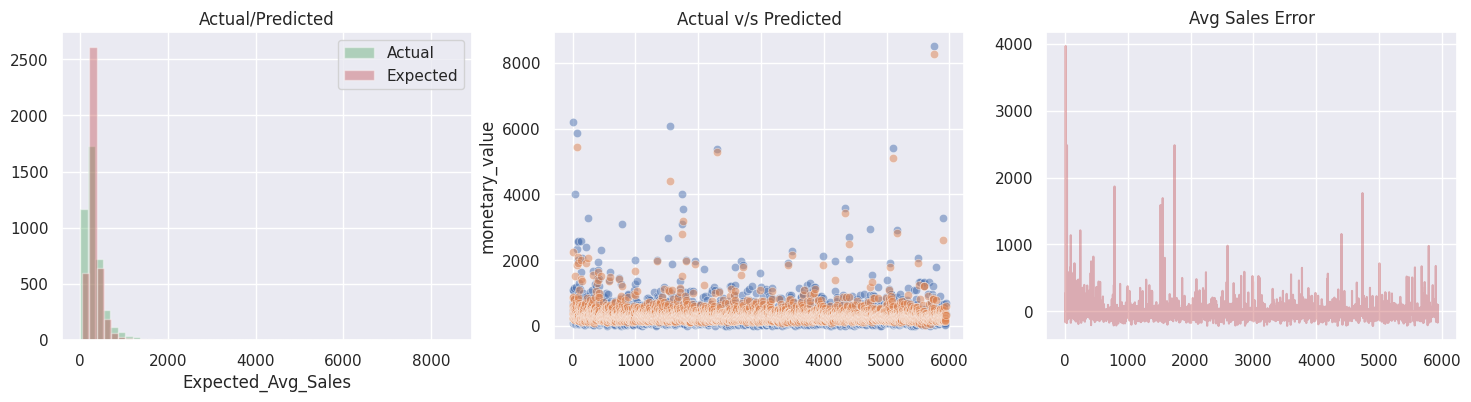

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.distplot(summary_["monetary_value"], color = "g", kde = False)
sns.distplot(summary_["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(1,3,2)
sns.scatterplot(summary_["monetary_value"], alpha = 0.5, palette = "winter")
sns.scatterplot(summary_["Expected_Avg_Sales"], alpha = 0.5, palette = "winter")
plt.title("Actual v/s Predicted")
plt.subplot(1,3,3)
plt.plot(summary_["monetary_value"]-summary_["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [ ]:
# Calculating the predicted Customer Lifetime Value (CLV) for each customer using the fitted Gamma-Gamma model and the summary statistics derived from the BG/NBD model
summary_["predicted_clv"] = ggf.customer_lifetime_value(bgf,
                                                       summary_["frequency"],
                                                       summary_["recency"],
                                                       summary_["T"],
                                                       summary_["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  predicted_clv  
1             0.495352   0.522388  0.027036          629.556290    7110.166375  
2             0.269178   0.330579  0.061401          409.972301    2512.081673  
3             0.172500   0.167364 -0.005136          842.513995    3449.798774  
6             0.566836   0.674157  0.107321          242.209404    3100.010138  
7             0.091934   0.147059  0.055125          254.858476     536.035114

In [ ]:
#adding a 5% of profit margin
summary_["CLV"] = summary_["predicted_clv"]*0.05

In [ ]:
summary_[summary_["Customer ID"] == 13902.0]

Customer ID  frequency  recency      T  monetary_value  \
1556      13902.0        5.0     99.0  731.0        6085.692   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1556             0.000758   1.515152  1.514393         4393.947298   

      predicted_clv       CLV  
1556      56.677321  2.833866

In [ ]:
summary_.sort_values(by = "Error", ascending = False)

Customer ID  frequency  recency      T  monetary_value  \
5276      17622.0        2.0      2.0  598.0         194.145   
3448      15794.0        1.0      1.0  737.0         102.000   
2884      15230.0        1.0      1.0  240.0          59.400   
5045      17391.0        1.0      1.0  164.0         101.760   
2446      14792.0        1.0      1.0   64.0           6.200   
...           ...        ...      ...    ...             ...   
1677      14023.0        1.0    243.0  250.0         310.930   
4149      16495.0        1.0    273.0  276.0         437.900   
2174      14520.0        1.0    289.0  290.0         105.600   
4904      17250.0        1.0    258.0  261.0         221.870   
1058      13404.0        1.0    211.0  212.0          34.680   

      predicted_purchases  actual_30      Error  Expected_Avg_Sales  \
5276             0.003059  30.000000  29.996941          265.738713   
3448             0.008321  30.000000  29.991679          259.074204   
2884             0.076162  30.000000  29.923838          245.259590   
5045             0.132262  30.000000  29.867738          258.996375   
2446             0.342512  30.000000  29.657488          228.007537   
...                   ...        ...        ...                 ...   
1677             0.154797   0.123457  -0.031340          326.827426   
4149             0.142739   0.109890  -0.032849          368.002110   
2174             0.136983   0.103806  -0.033177          260.241636   
4904             0.149580   0.116279  -0.033301          297.946452   
1058             0.177494   0.142180  -0.035314          237.243222   

      predicted_clv        CLV  
5276      14.937363   0.746868  
3448      44.309988   2.215499  
2884     381.340230  19.067012  
5045     696.754608  34.837730  
2446    1549.261568  77.463078  
...             ...        ...  
1677    1139.053953  56.952698  
4149    1191.242796  59.562140  
2174     811.317591  40.565880  
4904    1006.736400  50.336820  
1058     937.220109  46.861005  

[4185 rows x 11 columns]

In [ ]:
#prediction of the expected revenue or sales over a 30-day period based on the historical monetary value
actual = summary_["monetary_value"]*summary_["actual_30"]

In [ ]:
# Calculating a 'pred' metric based on 'Expected_Avg_Sales' and 'predicted_purchases'
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]

In [ ]:
# Calculating the error between 'actual' and 'pred' metrics
error = actual - pred

In [ ]:
# Creating a DataFrame 'result' using actual, pred, and error values
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [ ]:
# Computing and printing different error metrics
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result["Actual"], result["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163488
Mean Squared Error: 907287.253480996
Root Mean Squared Error: 952.5162746541373


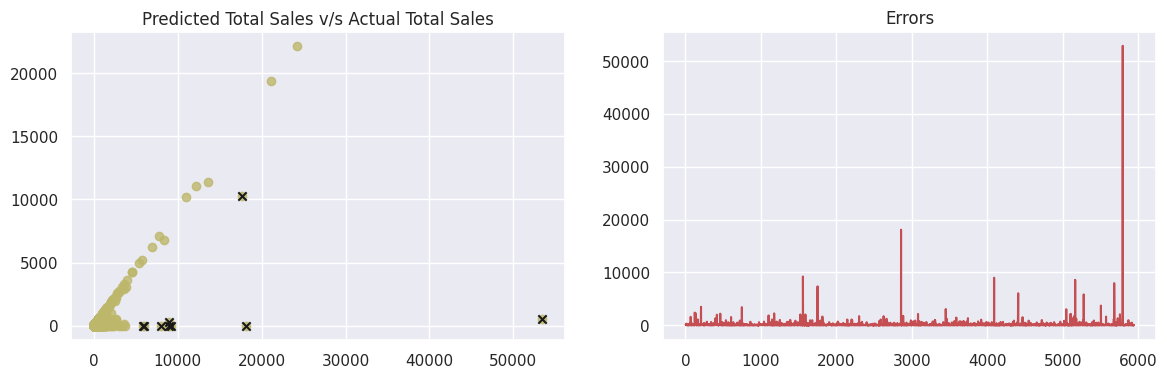

In [ ]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(result["Actual"],result["Predicted"],  color = "darkkhaki", alpha = 0.8, marker = 'o')
plt.scatter((result[result["Error"] > 5000]["Actual"]), (result[result["Error"] > 5000]["Predicted"]), color = "k", marker = "x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result["Error"], color = "r")
plt.title("Errors")
plt.show()

## Pareto - Negative Binomial Distribution + Gamma Gamma Distribution Model

In [ ]:
#creates a copy of the DataFrame rfm_summary
summary_pnbd = rfm_summary.copy()

In [ ]:
summary_pnbd.shape

(5942, 5)

In [ ]:
#estimate the parameters of the Pareto/NBD model based on the provided frequency, recency, and T
pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.0)
pareto_nbd.fit(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.88, beta: 124.23, r: 0.83, s: 0.16>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

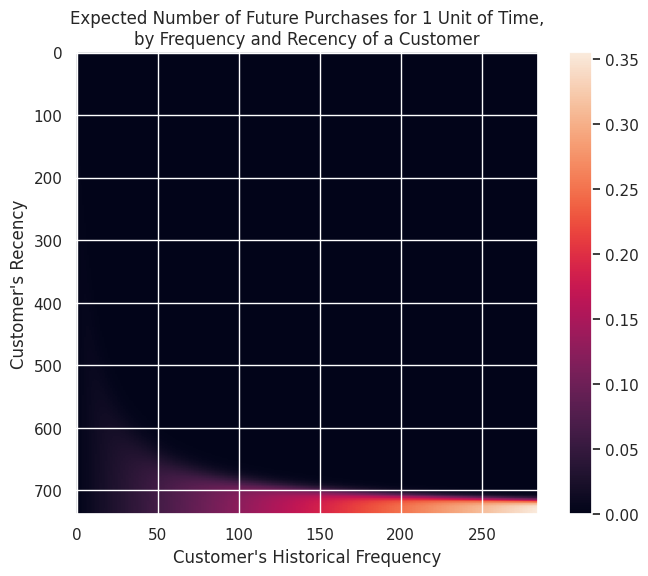

In [ ]:
#frequency-recency matrix plot using the fitted Pareto/NBD model
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(pareto_nbd)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

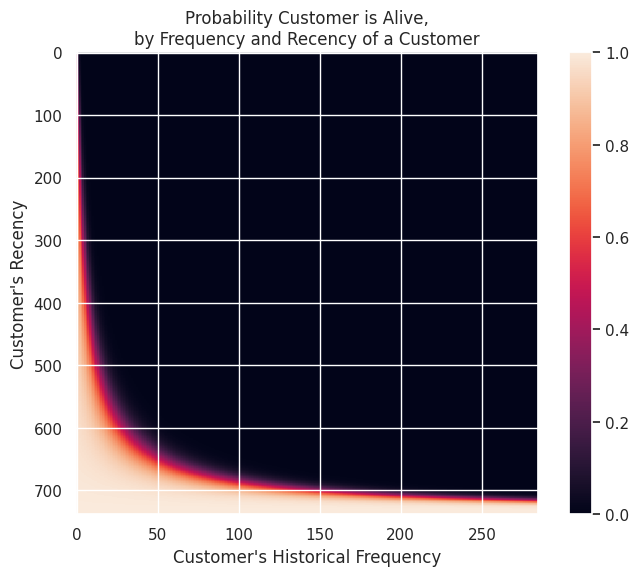

In [ ]:
#visualize the probability of customers being alive over time.
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(pareto_nbd)

In [ ]:
# Calculating the probabilities of customers being "not alive" and "alive"
summary_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])
summary_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [ ]:
## Calculating the predicted number of purchases for each customer over a specific future time period (30 days)
t = 30
summary_pnbd["predicted_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [ ]:
summary_pnbd.sort_values(by = "predicted_purchases").tail(5)

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
2260      14606.0      181.0    735.0  736.0      165.079448     0.000215   
5495      17841.0      193.0    736.0  737.0      357.437461     0.000216   
2965      15311.0      201.0    738.0  738.0      560.647015     0.000000   
402       12748.0      206.0    735.0  735.0      241.501117     0.000000   
2565      14911.0      284.0    737.0  738.0      948.996127     0.000229   

       p_alive  predicted_purchases  
2260  0.999785             6.799079  
5495  0.999784             7.238741  
2965  1.000000             7.529754  
402   1.000000             7.745187  
2565  0.999771            10.623760

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

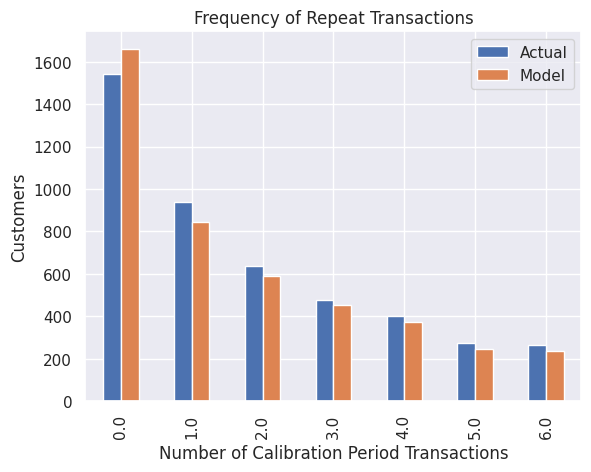

In [ ]:
#visualize the actual versus predicted repeat transactions
plot_period_transactions(pareto_nbd)

In [ ]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate",
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [ ]:
pareto_summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  \
Customer ID                                                         
12346.0               10.0        400.0  541.0                0.0   
12347.0                3.0        158.0  220.0                4.0   
12348.0                3.0        190.0  254.0                1.0   
12349.0                3.0        328.0  551.0                1.0   
12350.0                0.0          0.0  126.0                0.0   

             duration_holdout  
Customer ID                    
12346.0                 184.0  
12347.0                 184.0  
12348.0                 184.0  
12349.0                 184.0  
12350.0                 184.0

In [ ]:
# Fitting the Pareto/NBD model
pareto_nbd.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.65, beta: 1209.28, r: 0.82, s: 1.08>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

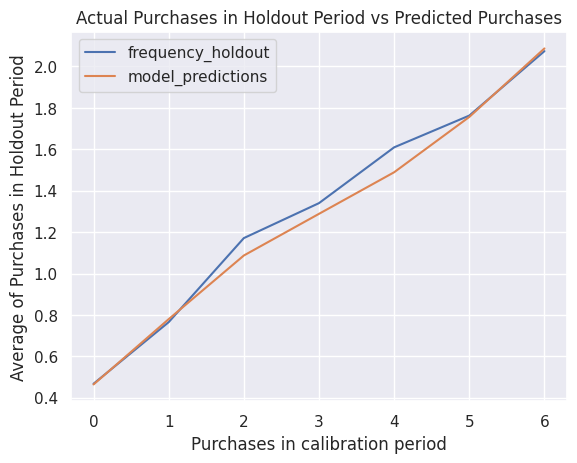

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, pareto_summary_cal_holdout)

In [ ]:
#Creating a function which can predict the future purchased value based on the lookup window

def pareto_get_pred_error(t, id_):

    individual_p = summary_pnbd[summary_pnbd["Customer ID"] == id_]

    ind_pred_p = pareto_nbd.predict(t, individual_p["frequency"], individual_p["recency"], individual_p["T"])

    actual_val_p = individual_p["frequency"]/individual_p["recency"]*t

    error = actual_val_p - ind_pred_p

    print("Your Predicted Purchase: %s" % (ind_pred_p))
    print("Your Actual Purchase: %s" % (actual_val_p))
    print("Prediction Error: %s" % (error))

In [ ]:
pareto_get_pred_error(30, 12346.0)

Your Predicted Purchase: 0    0.032937
dtype: float64
Your Actual Purchase: 0    0.75
dtype: float64
Prediction Error: 0    0.717063
dtype: float64


In [ ]:
# Calculating an 'actual' metric for a specific time period (30 days) using frequency and recency
summary_pnbd["actual_30_p"] = summary_pnbd["frequency"]/summary_pnbd["recency"]*30

In [ ]:
summary_pnbd["actual_30_p"].fillna(0, inplace = True)

In [ ]:
#calculating the prediction error for the 30 days purchase prediction
summary_pnbd["p_error"] = summary_pnbd["actual_30_p"]-summary_pnbd["predicted_purchases"]

In [ ]:
print("Mean Squared Error: %s" % mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])))
print("Average Purchase Error: %s" %(summary_pnbd["p_error"].mean()))

Mean Squared Error: 4.335935085643992
Root Mean Squared Error: 2.0822908263842477
Average Purchase Error: 0.4123668150312112


In [ ]:
pareto_mse_purchase = mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])
pareto_rmse_purchase = sqrt(mean_squared_error(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"]))
pareto_avg_error_purchase = summary_pnbd["p_error"].mean()

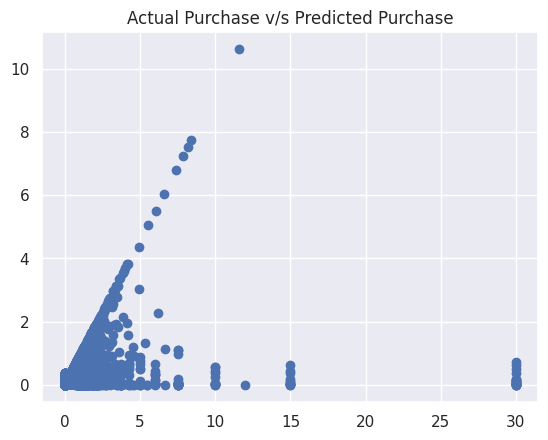

In [ ]:
plt.scatter(summary_pnbd["actual_30_p"], summary_pnbd["predicted_purchases"])
plt.title("Actual Purchase v/s Predicted Purchase")
plt.show()

In [ ]:
#Get the history alive plot to check whether the customer is alive or not

def get_history_alive(t_, data_, id_):

    individual_alive = data[data["Customer ID"] == id_]
    plot_history_alive(pareto_nbd, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

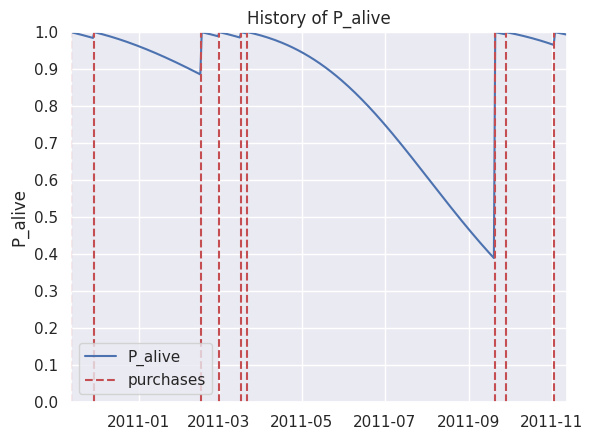

In [ ]:
get_history_alive(365, data, 12352.0)

In [ ]:
summary_copy = summary_pnbd.copy()

In [ ]:
summary_copy = summary_copy[(summary_copy["frequency"] > 0) & (summary_copy["monetary_value"] > 0)]

<Axes: >

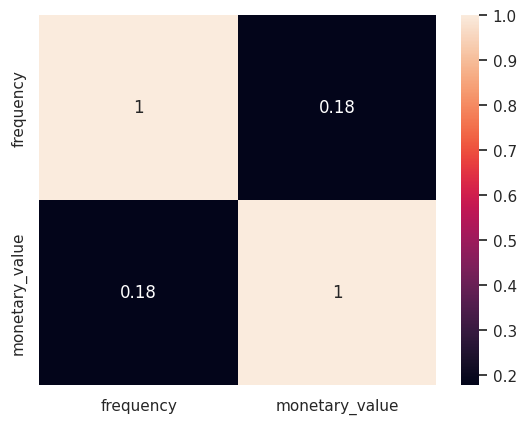

In [ ]:
sns.heatmap(summary_copy[["frequency", "monetary_value"]].corr(), annot = True)

### Gamma Gamma Distribution

In [ ]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [ ]:
ggf_p.fit(summary_copy["frequency"], summary_copy["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [ ]:
ggf_p.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [ ]:
summary_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_copy["frequency"],
                                                                        summary_copy["monetary_value"])

In [ ]:
summary_copy.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034901   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003675   
6      12352.0        8.0    356.0  392.0      218.182500     0.017284   
7      12353.0        1.0    204.0  408.0       89.000000     0.126957   

    p_alive  predicted_purchases  actual_30_p   p_error  expected_avg_sales_p  
1  0.999366             0.499742     0.522388  0.022646            629.556290  
2  0.965099             0.277711     0.330579  0.052867            409.972301  
3  0.996325             0.180376     0.167364 -0.013012            842.513995  
6  0.982716             0.568667     0.674157  0.105491            242.209404  
7  0.873043             0.101372     0.147059  0.045687            254.858476

In [ ]:
avg_purchase_error = summary_copy["monetary_value"].mean() - summary_copy["expected_avg_sales_p"].mean()

In [ ]:
print("Acutal Avg Sales: %s" % summary_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Acutal Avg Sales: 330.6608495198251
Predicted Avg Sales: 340.1889755829261
Mean Sqaured Error: 20896.881880784826
Root Mean Sqaured Error: 144.55753830494217
Avg Sales Error: -9.528126063101013


In [ ]:
actual = summary_copy["actual_30_p"] * summary_copy["monetary_value"]
predicted = summary_copy["predicted_purchases"] * summary_copy["expected_avg_sales_p"]

In [ ]:
error = np.mod(actual,predicted)

In [ ]:
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T

In [ ]:
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: 46.396358623608016
Mean Squared Error: 911081.8663111449
Root Mean Squared Error: 954.5060850047761


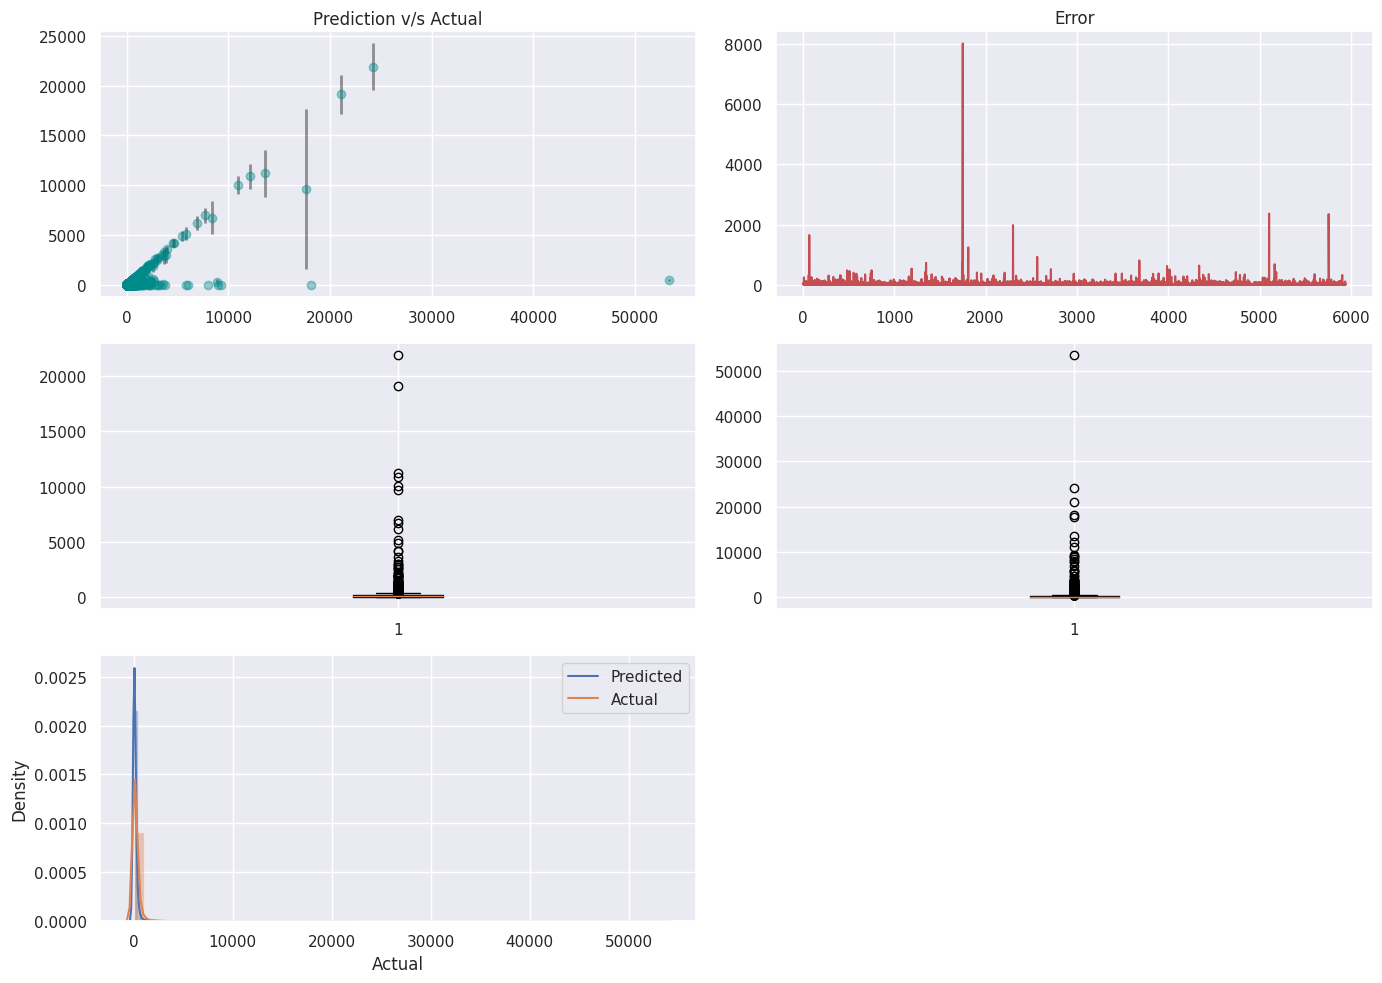

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(321)
plt.errorbar(result_p["Actual"], result_p["Predicted"], yerr=result_p["Error"], fmt='o', color='darkcyan',
             ecolor='black', elinewidth=2, capsize=0, alpha = 0.4);
plt.title("Prediction v/s Actual")
plt.subplot(322)
plt.plot(result_p["Error"], color = 'r')
plt.title("Error")
plt.subplot(323)
plt.boxplot(result_p["Predicted"])
plt.subplot(324)
plt.boxplot(result_p["Actual"])
plt.subplot(325)
sns.distplot(result_p["Predicted"])
sns.distplot(result_p["Actual"])
plt.legend(["Predicted", "Actual"])
plt.tight_layout()

In [ ]:
summary_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       summary_copy["frequency"],
                                                       summary_copy["recency"],
                                                       summary_copy["T"],
                                                       summary_copy["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
summary_copy.shape

(4185, 12)

In [ ]:
summary_copy["CLV_p"] = summary_copy["predicted_clv_p"]*0.05

In [ ]:
summary_copy.head()

Customer ID  frequency  recency      T  monetary_value  p_not_alive  \
1      12347.0        7.0    402.0  404.0      717.398571     0.000634   
2      12348.0        4.0    363.0  438.0      449.310000     0.034901   
3      12349.0        4.0    717.0  735.0     1107.172500     0.003675   
6      12352.0        8.0    356.0  392.0      218.182500     0.017284   
7      12353.0        1.0    204.0  408.0       89.000000     0.126957   

    p_alive  predicted_purchases  actual_30_p   p_error  expected_avg_sales_p  \
1  0.999366             0.499742     0.522388  0.022646            629.556290   
2  0.965099             0.277711     0.330579  0.052867            409.972301   
3  0.996325             0.180376     0.167364 -0.013012            842.513995   
6  0.982716             0.568667     0.674157  0.105491            242.209404   
7  0.873043             0.101372     0.147059  0.045687            254.858476   

   predicted_clv_p       CLV_p  
1      6427.083703  321.354185  
2      2243.170549  112.158527  
3      3184.476671  159.223834  
6      2760.845696  138.042285  
7       474.570351   23.728518

In [ ]:
with open("summary_copy_pareto_model.pkl", "wb") as fh:
    pickle.dump(summary_copy, fh)
with open("summary_copy_bg_nbd_model.pkl", "wb") as fh:
    pickle.dump(summary_, fh)

## Modified Beta Geom + Gamma Gamma Distribution Model

In [ ]:
summary_mbg = rfm_summary.copy()

In [ ]:
summary_mbg.head()

Customer ID  frequency  recency      T  monetary_value
0      12346.0       10.0    400.0  725.0      -15.468000
1      12347.0        7.0    402.0  404.0      717.398571
2      12348.0        4.0    363.0  438.0      449.310000
3      12349.0        4.0    717.0  735.0     1107.172500
4      12350.0        0.0      0.0  310.0        0.000000

In [ ]:
# Fitting the Modified Beta-Geometric (MBG) model
mbg = ModifiedBetaGeoFitter(penalizer_coef = 0.0)
mbg.fit(summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 5942 subjects, a: 0.18, alpha: 57.90, b: 2.05, r: 0.84>

In [ ]:
mbg.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r       0.837666  0.029295         0.780247         0.895084
alpha  57.895342  1.972543        54.029159        61.761525
a       0.180562  0.015152         0.150864         0.210260
b       2.045383  0.314244         1.429466         2.661301

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

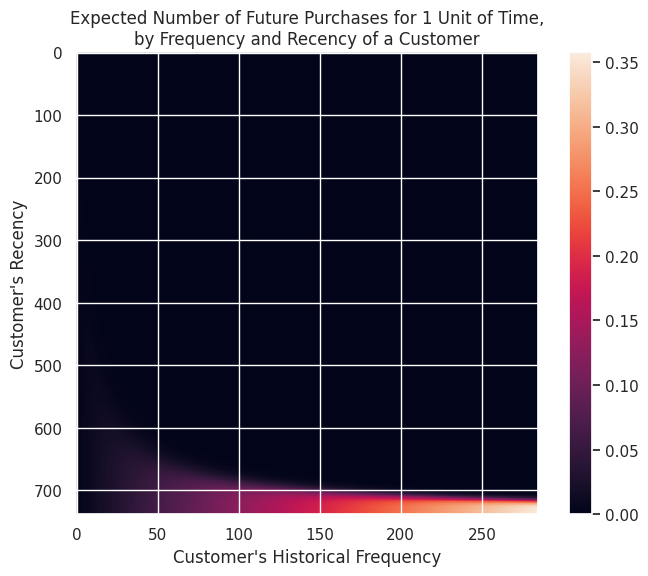

In [ ]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(mbg)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

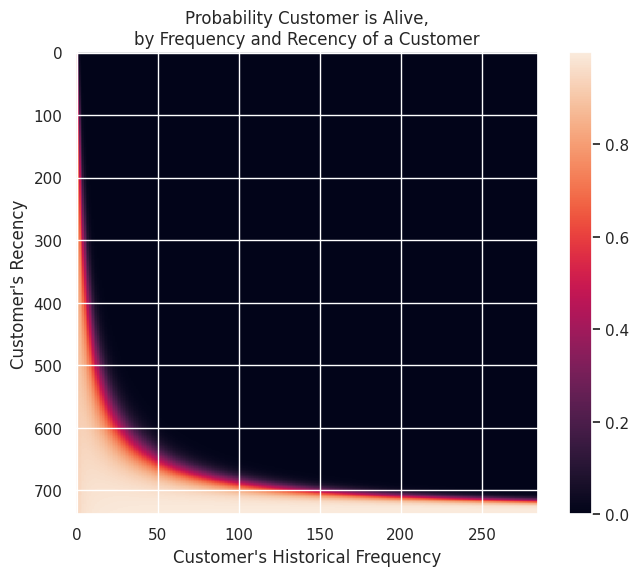

In [ ]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(mbg)

In [ ]:
#predict the no.of purchases
t = 30
summary_mbg["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_mbg["frequency"], summary_mbg["recency"], summary_mbg["T"])

In [ ]:
summary_mbg

Customer ID  frequency  recency      T  monetary_value  \
0         12346.0       10.0    400.0  725.0      -15.468000   
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
4         12350.0        0.0      0.0  310.0        0.000000   
...           ...        ...      ...    ...             ...   
5937      18283.0       18.0    655.0  658.0      146.405556   
5938      18284.0        1.0      2.0  431.0      -25.000000   
5939      18285.0        0.0      0.0  660.0        0.000000   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  
0                0.056541  
1                0.491299  
2                0.263606  
3                0.170685  
4                0.055882  
...                   ...  
5937             0.778669  
5938             0.023597  
5939             0.028394  
5940             0.058435  
5941             0.243185  

[5942 rows x 6 columns]

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

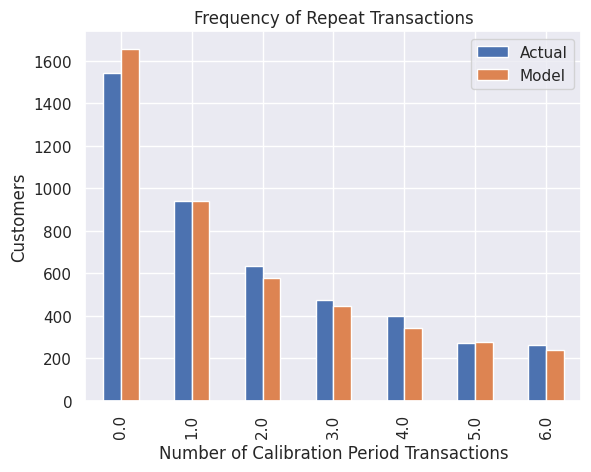

In [ ]:
plot_period_transactions(mbg)

In [ ]:
#dividing our dataset into training & holdout
summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate",
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [ ]:
#fitting the model
mbg.fit(summary_cal_holdout["frequency_cal"],
       summary_cal_holdout["recency_cal"],
       summary_cal_holdout["T_cal"])

<lifetimes.ModifiedBetaGeoFitter: fitted with 5025 subjects, a: 0.28, alpha: 56.91, b: 3.00, r: 0.84>

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

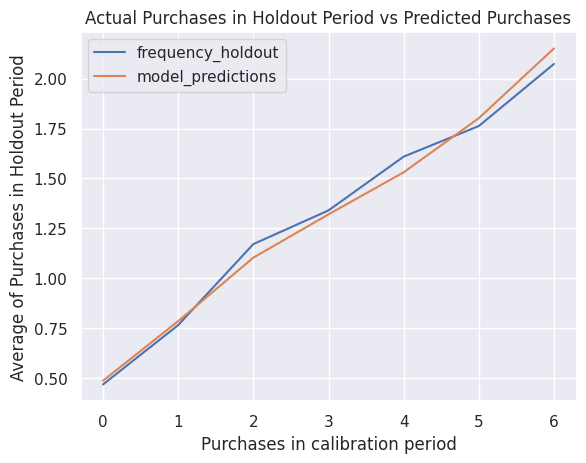

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(mbg, summary_cal_holdout)

In [ ]:
summary_mbg["actual_30"] = summary_mbg["frequency"]/summary_mbg["recency"]*30

In [ ]:
summary_mbg = summary_mbg.fillna(value = 0)

In [ ]:
summary_mbg.head()

Customer ID  frequency  recency      T  monetary_value  \
0      12346.0       10.0    400.0  725.0      -15.468000   
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
4      12350.0        0.0      0.0  310.0        0.000000   

   predicted_purchases  actual_30  
0             0.056541   0.750000  
1             0.491299   0.522388  
2             0.263606   0.330579  
3             0.170685   0.167364  
4             0.055882   0.000000

In [ ]:
summary_mbg["Error"] = summary_mbg["actual_30"] - summary_mbg["predicted_purchases"]

In [ ]:
mse = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])

In [ ]:
print("Mean Squared Error: %s" % mse)
print("Average Error:  %s" % summary_mbg["Error"].mean())
print("Root Mean Squared Error: %s" % sqrt(mse))

Mean Squared Error: 4.346082724386109
Average Error:  0.41709029134495434
Root Mean Squared Error: 2.0847260549976605


In [ ]:
mbg_mse_purchase = mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"])
mbg_rmse_purchase = sqrt(mean_squared_error(summary_mbg["actual_30"],summary_mbg["predicted_purchases"]))
mbg_avg_purchase_error = (summary_mbg["actual_30"].mean() - summary_mbg["predicted_purchases"].mean())

In [ ]:
res_summary = summary_mbg[summary_mbg["frequency"] > 0]

In [ ]:
final_summary = res_summary[res_summary["monetary_value"] > 0]

<Axes: >

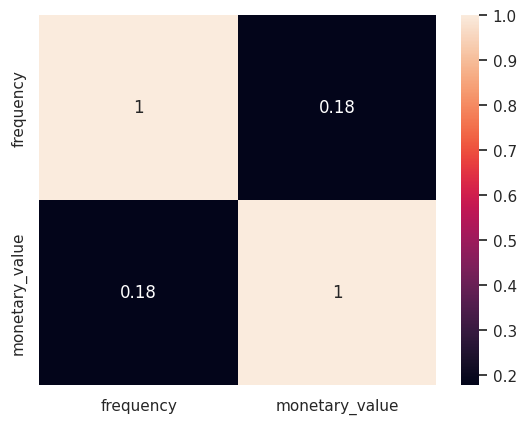

In [ ]:
sns.heatmap(final_summary[["frequency", "monetary_value"]].corr(), annot = True)

In [ ]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)

In [ ]:
ggf.fit(final_summary["frequency"], final_summary["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.37, q: 3.86, v: 696.90>

In [ ]:
ggf.summary

coef   se(coef)  lower 95% bound  upper 95% bound
p    1.374683   0.058567         1.259892         1.489475
q    3.864415   0.134545         3.600708         4.128123
v  696.904781  50.767856       597.399783       796.409779

In [ ]:
summary_mbg_new = summary_mbg[(summary_mbg["monetary_value"] > 0) & (summary_mbg["frequency"] > 0)]

In [ ]:
summary_mbg_new

Customer ID  frequency  recency      T  monetary_value  \
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
6         12352.0        8.0    356.0  392.0      218.182500   
7         12353.0        1.0    204.0  408.0       89.000000   
...           ...        ...      ...    ...             ...   
5935      18281.0        1.0    397.0  577.0       80.820000   
5936      18282.0        2.0    119.0  126.0       38.195000   
5937      18283.0       18.0    655.0  658.0      146.405556   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  actual_30     Error  
1                0.491299   0.522388  0.031089  
2                0.263606   0.330579  0.066973  
3                0.170685   0.167364 -0.003321  
6                0.558628   0.674157  0.115529  
7                0.089547   0.147059  0.057512  
...                   ...        ...       ...  
5935             0.069791   0.075567  0.005776  
5936             0.422312   0.504202  0.081890  
5937             0.778669   0.824427  0.045759  
5940             0.058435   0.242915  0.184480  
5941             0.243185   0.258621  0.015436  

[4185 rows x 8 columns]

In [ ]:
summary_mbg_new["Expected_Avg_Sales"] = ggf.conditional_expected_average_profit(summary_mbg_new["frequency"],
                                                                        summary_mbg_new["monetary_value"])

In [ ]:
summary_mbg_new.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  
1             0.491299   0.522388  0.031089          629.556290  
2             0.263606   0.330579  0.066973          409.972301  
3             0.170685   0.167364 -0.003321          842.513995  
6             0.558628   0.674157  0.115529          242.209404  
7             0.089547   0.147059  0.057512          254.858476

In [ ]:
print("Expected Average Sales: %s" % summary_mbg_new["Expected_Avg_Sales"].mean())
print("Actual Average Sales: %s" % summary_mbg_new["monetary_value"].mean())
print("Difference: %s" % (summary_mbg_new["monetary_value"].mean() - summary_mbg_new["Expected_Avg_Sales"].mean()))
print("Mean Squared Error: %s" % mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"])))

Expected Average Sales: 340.1889755829261
Actual Average Sales: 330.6608495198251
Difference: -9.528126063101013
Mean Squared Error: 20896.881880784826
Root Mean Squared Error: 144.55753830494217


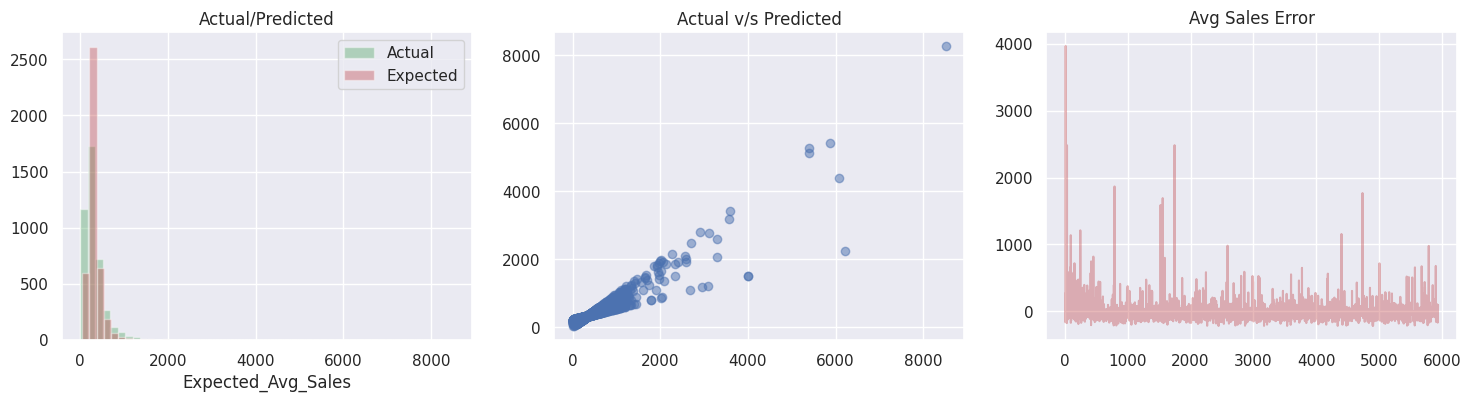

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.distplot(summary_mbg_new["monetary_value"], color = "g", kde = False)
sns.distplot(summary_mbg_new["Expected_Avg_Sales"], color = "r", kde = False)
plt.title("Actual/Predicted")
plt.legend(["Actual", "Expected"])
plt.subplot(132)
plt.scatter(summary_mbg_new["monetary_value"], summary_mbg_new["Expected_Avg_Sales"], alpha = 0.5)
plt.title("Actual v/s Predicted")
plt.subplot(133)
plt.plot(summary_mbg_new["monetary_value"]-summary_mbg_new["Expected_Avg_Sales"], color = 'r', alpha = 0.4)
plt.title("Avg Sales Error")
plt.show()

In [ ]:
summary_mbg_new["predicted_clv"] = ggf.customer_lifetime_value(mbg,
                                                       summary_mbg_new["frequency"],
                                                       summary_mbg_new["recency"],
                                                       summary_mbg_new["T"],
                                                       summary_mbg_new["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
summary_mbg_new

Customer ID  frequency  recency      T  monetary_value  \
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
6         12352.0        8.0    356.0  392.0      218.182500   
7         12353.0        1.0    204.0  408.0       89.000000   
...           ...        ...      ...    ...             ...   
5935      18281.0        1.0    397.0  577.0       80.820000   
5936      18282.0        2.0    119.0  126.0       38.195000   
5937      18283.0       18.0    655.0  658.0      146.405556   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1                0.491299   0.522388  0.031089          629.556290   
2                0.263606   0.330579  0.066973          409.972301   
3                0.170685   0.167364 -0.003321          842.513995   
6                0.558628   0.674157  0.115529          242.209404   
7                0.089547   0.147059  0.057512          254.858476   
...                   ...        ...       ...                 ...   
5935             0.069791   0.075567  0.005776          252.205811   
5936             0.422312   0.504202  0.081890          189.361729   
5937             0.778669   0.824427  0.045759          165.915956   
5940             0.058435   0.242915  0.184480          348.308624   
5941             0.243185   0.258621  0.015436          603.671615   

      predicted_clv  
1       7003.290033  
2       2522.287420  
3       3504.589499  
6       3031.895454  
7        585.402211  
...             ...  
5935     462.472507  
5936    1721.587682  
5937    2985.789802  
5940     502.273040  
5941    3515.355099  

[4185 rows x 10 columns]

In [ ]:
summary_mbg_new["CLV"] = summary_mbg_new["predicted_clv"]*0.05

In [ ]:
actual = summary_["monetary_value"]*summary_["actual_30"]
pred = summary_["Expected_Avg_Sales"]*summary_["predicted_purchases"]
error = actual - pred
result = pd.DataFrame([actual, pred, error], index = ["Actual", "Predicted", "Error"]).T

In [ ]:
print("Average Error: %s" % result["Error"].mean())
print("Mean Squared Error: %s" % (mean_squared_error(result["Actual"], result["Predicted"])))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result["Actual"], result["Predicted"])))

Average Error: 108.19828103163488
Mean Squared Error: 907287.253480996
Root Mean Squared Error: 952.5162746541373


In [ ]:
summary_mbg_new

Customer ID  frequency  recency      T  monetary_value  \
1         12347.0        7.0    402.0  404.0      717.398571   
2         12348.0        4.0    363.0  438.0      449.310000   
3         12349.0        4.0    717.0  735.0     1107.172500   
6         12352.0        8.0    356.0  392.0      218.182500   
7         12353.0        1.0    204.0  408.0       89.000000   
...           ...        ...      ...    ...             ...   
5935      18281.0        1.0    397.0  577.0       80.820000   
5936      18282.0        2.0    119.0  126.0       38.195000   
5937      18283.0       18.0    655.0  658.0      146.405556   
5940      18286.0        2.0    247.0  723.0      362.740000   
5941      18287.0        6.0    696.0  738.0      697.165000   

      predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1                0.491299   0.522388  0.031089          629.556290   
2                0.263606   0.330579  0.066973          409.972301   
3                0.170685   0.167364 -0.003321          842.513995   
6                0.558628   0.674157  0.115529          242.209404   
7                0.089547   0.147059  0.057512          254.858476   
...                   ...        ...       ...                 ...   
5935             0.069791   0.075567  0.005776          252.205811   
5936             0.422312   0.504202  0.081890          189.361729   
5937             0.778669   0.824427  0.045759          165.915956   
5940             0.058435   0.242915  0.184480          348.308624   
5941             0.243185   0.258621  0.015436          603.671615   

      predicted_clv         CLV  
1       7003.290033  350.164502  
2       2522.287420  126.114371  
3       3504.589499  175.229475  
6       3031.895454  151.594773  
7        585.402211   29.270111  
...             ...         ...  
5935     462.472507   23.123625  
5936    1721.587682   86.079384  
5937    2985.789802  149.289490  
5940     502.273040   25.113652  
5941    3515.355099  175.767755  

[4185 rows x 11 columns]

## CLV Results


In [ ]:
predicted_clv_results = pd.DataFrame(summary_[["Customer ID", "predicted_clv"]])

In [ ]:
predicted_clv_results = predicted_clv_results.merge(summary_copy[["Customer ID", "predicted_clv_p"]], on = "Customer ID")

In [ ]:
predicted_clv_results = predicted_clv_results.merge(summary_mbg_new[["Customer ID", "predicted_clv"]], on = "Customer ID")

In [ ]:
predicted_clv_results.columns = ["Customer ID", "BG-NBD", "Pareto-NBD", "MBG-NBD"]

In [ ]:
predicted_clv_results.head(5)

Customer ID       BG-NBD   Pareto-NBD      MBG-NBD
0      12347.0  7110.166375  6427.083703  7003.290033
1      12348.0  2512.081673  2243.170549  2522.287420
2      12349.0  3449.798774  3184.476671  3504.589499
3      12352.0  3100.010138  2760.845696  3031.895454
4      12353.0   536.035114   474.570351   585.402211

In [ ]:
predicted_clv_results.to_csv("Predicted CLV Results.csv")

In [ ]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]

In [ ]:
data = [[bgf_mse_purchase, pareto_mse_purchase, mbg_mse_purchase],
[bgf_rmse_purchase_30, pareto_rmse_purchase, mbg_rmse_purchase], [bgf_avg_error_purchase_30, pareto_avg_error_purchase, mbg_avg_purchase_error]]

In [ ]:
model_purchase_result = pd.DataFrame(data, columns = ["BG-NBD", "Pareto-NBD", "MBG-NBD"], index = indexes)

In [ ]:
model_purchase_result

BG-NBD  Pareto-NBD   MBG-NBD
MSE Purchase Error   4.337883    4.335935  4.346083
RMSE Purchase Error  2.082758    2.082291  2.084726
Avg Purchase Error   0.411798    0.412367  0.417090

As we can see here is that there is no much difference when it comes to the performance of these models but Pareto NBD model is slightly performing better when it comes it minimizing the MSE & RMSE Errors.

## CUSTOMER SEGMENTATION USING PREDICTED CLV

We have calculated the CLV and deliver the same to the marketing team but now marketing team is interested to know the most profitable customers segment which they can target the deliver the best optimized campaigns.

Our work is to deliver the requested data to the marketing team & to perform the same we will be going to perform the clustering on the predicted metrics.

In [ ]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1             0.495352   0.522388  0.027036          629.556290   
2             0.269178   0.330579  0.061401          409.972301   
3             0.172500   0.167364 -0.005136          842.513995   
6             0.566836   0.674157  0.107321          242.209404   
7             0.091934   0.147059  0.055125          254.858476   

   predicted_clv         CLV  
1    7110.166375  355.508319  
2    2512.081673  125.604084  
3    3449.798774  172.489939  
6    3100.010138  155.000507  
7     536.035114   26.801756

In [ ]:
col = ["predicted_purchases", "Expected_Avg_Sales", "predicted_clv", "CLV"]

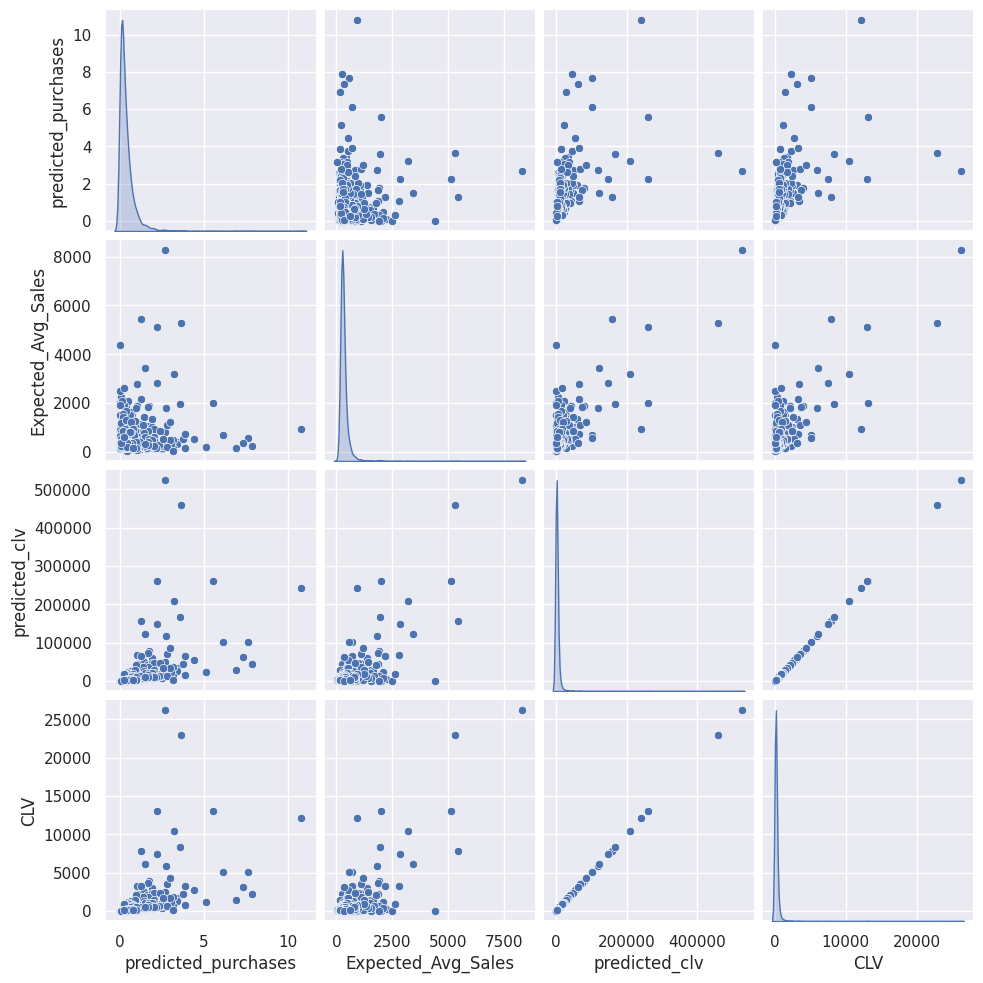

In [ ]:
sns.pairplot(summary_[col], diag_kind = "kde")

In [ ]:
new_df = summary_[col]

In [ ]:
#importing libraries
from sklearn.cluster import KMeans

In [ ]:
#plot of the inertia values against the number of clusters to determine the optimal number of clusters for your KMeans algorithm using Elbow Method
inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

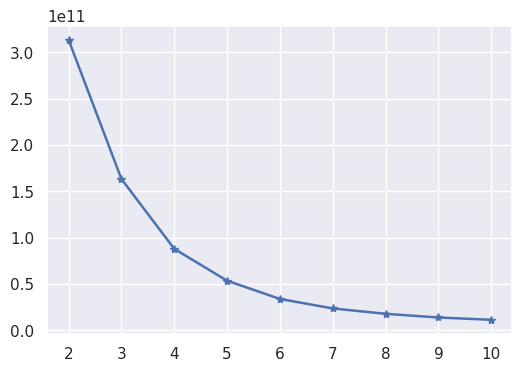

In [ ]:
#plot the graph of elbow method to find K value
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [ ]:
k_model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000)

In [ ]:
k_model_fit = k_model.fit(new_df)

In [ ]:
new_df

predicted_purchases  Expected_Avg_Sales  predicted_clv         CLV
1                0.495352          629.556290    7110.166375  355.508319
2                0.269178          409.972301    2512.081673  125.604084
3                0.172500          842.513995    3449.798774  172.489939
6                0.566836          242.209404    3100.010138  155.000507
7                0.091934          254.858476     536.035114   26.801756
...                   ...                 ...            ...         ...
5935             0.071001          252.205811     421.725814   21.086291
5936             0.428049          189.361729    1709.150147   85.457507
5937             0.782309          165.915956    3051.679784  152.583989
5940             0.064562          348.308624     490.633249   24.531662
5941             0.245988          603.671615    3511.932539  175.596627

[4185 rows x 4 columns]

In [ ]:
#find the coordinates of the cluster centers after fitting the KMeans model
centers = k_model_fit.cluster_centers_

In [ ]:
centers

array([[3.69311610e-01, 3.25866167e+02, 2.73002399e+03, 1.36501199e+02],
       [4.13074421e+00, 3.06664488e+03, 2.06399358e+05, 1.03199679e+04],
       [3.17340495e+00, 6.78069872e+03, 4.91692315e+05, 2.45846158e+04],
       [2.78825440e+00, 1.07845643e+03, 5.44760336e+04, 2.72380168e+03]])

In [ ]:
labels = k_model_fit.labels_

In [ ]:
labels = pd.Series(labels, name = "Labels")

In [ ]:
summary_ = pd.concat([summary_, labels], axis = 1)

In [ ]:
label_mapper = dict({0 : "Low", 3: "Medium", 1: "High", 2: "V_High"})

In [ ]:
summary_["Labels"] = summary_["Labels"].map(label_mapper)

In [ ]:
summary_.groupby("Labels").mean().T

Labels                       High           Low        Medium  V_High
Customer ID          14435.000000  14442.813906  14494.384615     NaN
frequency               10.400000      7.783231      6.000000     NaN
recency                485.400000    386.536810    400.346154     NaN
T                      573.400000    522.978528    547.269231     NaN
monetary_value         250.246097    338.153486    305.119500     NaN
predicted_purchases      0.479826      0.401779      0.325608     NaN
actual_30                1.109715      0.756988      0.497113     NaN
Error                    0.629889      0.355209      0.171506     NaN
Expected_Avg_Sales     272.390964    344.004156    306.595808     NaN
predicted_clv         3077.146379   3771.646540   2667.651340     NaN
CLV                    153.857319    188.582327    133.382567     NaN

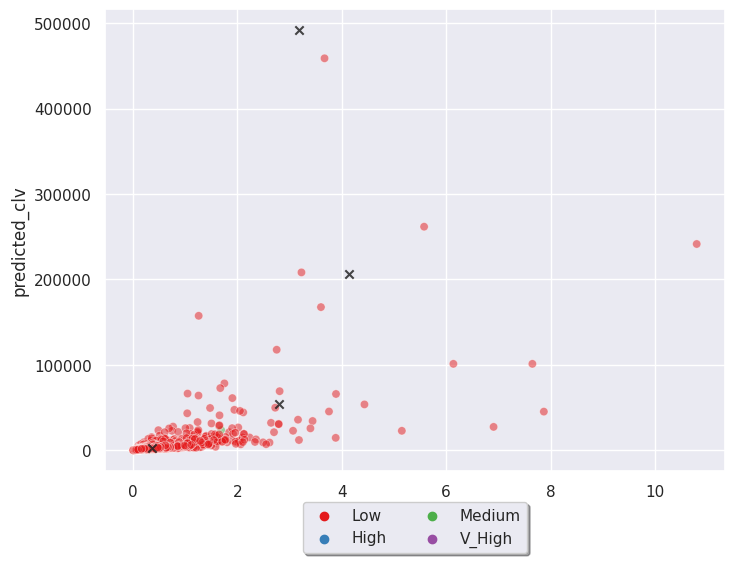

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", palette = "Set1",hue = "Labels", data = summary_, alpha=0.5)# hue = "Labels"
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

In [ ]:
summary_.head()

Customer ID  frequency  recency      T  monetary_value  \
1      12347.0        7.0    402.0  404.0      717.398571   
2      12348.0        4.0    363.0  438.0      449.310000   
3      12349.0        4.0    717.0  735.0     1107.172500   
6      12352.0        8.0    356.0  392.0      218.182500   
7      12353.0        1.0    204.0  408.0       89.000000   

   predicted_purchases  actual_30     Error  Expected_Avg_Sales  \
1             0.495352   0.522388  0.027036          629.556290   
2             0.269178   0.330579  0.061401          409.972301   
3             0.172500   0.167364 -0.005136          842.513995   
6             0.566836   0.674157  0.107321          242.209404   
7             0.091934   0.147059  0.055125          254.858476   

   predicted_clv         CLV Labels  
1    7110.166375  355.508319    Low  
2    2512.081673  125.604084    Low  
3    3449.798774  172.489939    Low  
6    3100.010138  155.000507    Low  
7     536.035114   26.801756    Low

In [ ]:
summary_.to_csv("customer_segmentation_result.csv")